#세째 마당 - 인구 공공 데이터
 지금까지 기온 공공 데이터를 가지고 데이터에서 어떤 정보를 추출할 수 있을까 질문을 던졌고 질문에 답을 찾기 위한 과정을 살펴 봤고 이를 파이썬 코드로 구현했습니다. 또한 파이썬 코드로 데이터를 시각화 해봄으로써 데이터가 가지고 있는 '정보'를 살펴 봤습니다.
 그간의 작업을 **데이터 분석**이라고 말하기에는 부족한 점이 없지 않지만 데이터 분석을 하는 과정에 대해 어느 정도 감을 잡으셨을 것으로 기대하겠습니다.

##UNIT 07 - 우리 동네 인구 구조 시각화하기
우리 동네에 사는 사람들은 나와 연배가 비슷한 사람이 얼마나 있을까? 10대 학생들은 몇 명이나 살고 있을까 등 살짝 궁금한 것이 있을 것입니다. 만약 여러분이 치킨 집을 열 계획이 있으시다면 오픈 하려는 치킨집이 위치한 동네에 60세 이상의 연령대이신 분들이 많이 거주 하는 동네가 좋을까요? 아니면 20~30대가 많은 사는 동네가 더 적합할까요?

###1. 인구 공공 데이터 내려 받기
행정안전부에서는 홈페이지를 통해 다양한 공공 데이터를 제공합니다. 그중에서 인구 데이터를 가져 오겠습니다.

[행정안전부](http://www.mois.go.kr) 홈페이지에 접속하십시요. 상단 메뉴에서 **정책자료/통계/주민등록 인구통계/연령별 인구현황**을 선택합니다.
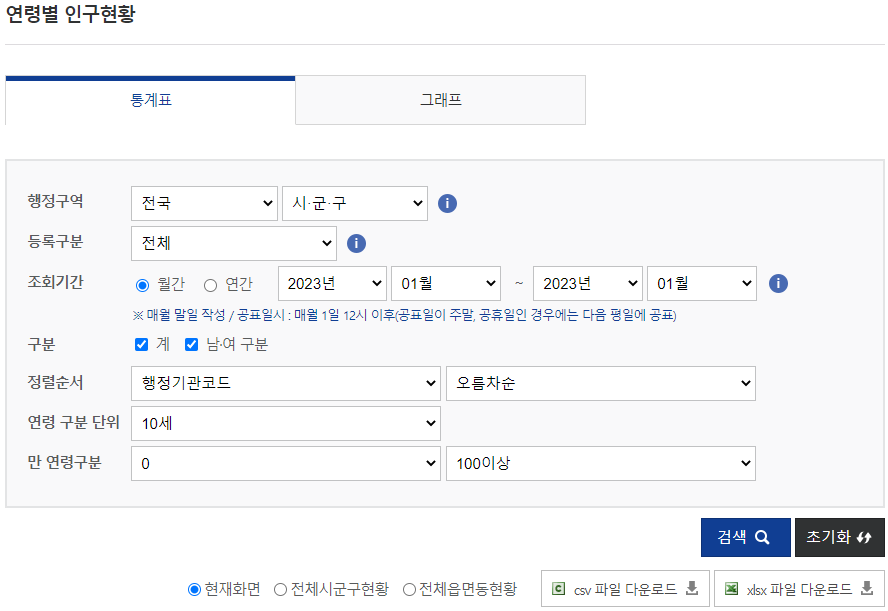  

에서 '통계표' 탭에서
* '조회기간'은 2023년 1월로 설정하고
* '구분'에서 '남여구분'을 언체크 하시고
* '연령 구분 단위'를 1세로 변경합니다.
* '만 연령구분'을 0에서부터 100이상으로 설정합니다.
* 검색 버튼을 누릅니다. 웹 페이지 하단에 인구현황이 표시됩니다.
* '전체읍면동현항'을 선택한 후
* "csv파일 다운로드" 버튼을 클릭하십시요.
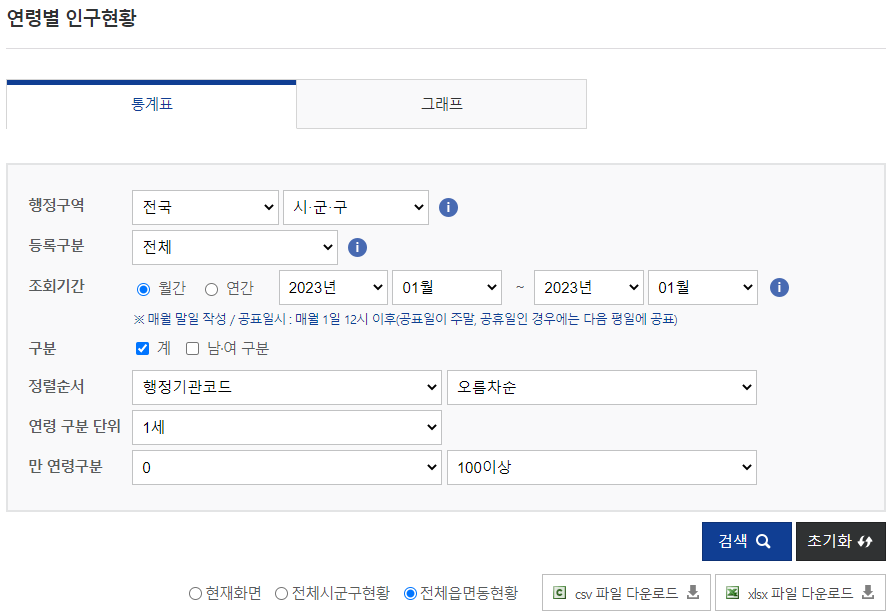

다운로드 받은 csv 파일의 이름을 **age**로 변경하겠습니다.


###2. 인구 데이터 살펴보기

age.csv 파일을 더블 클릭 해서 excel로 열어보겠습니다.그리고 셀 폭을 조절하시면 아래와 같은 내용을 확인하실 수 있습니다.

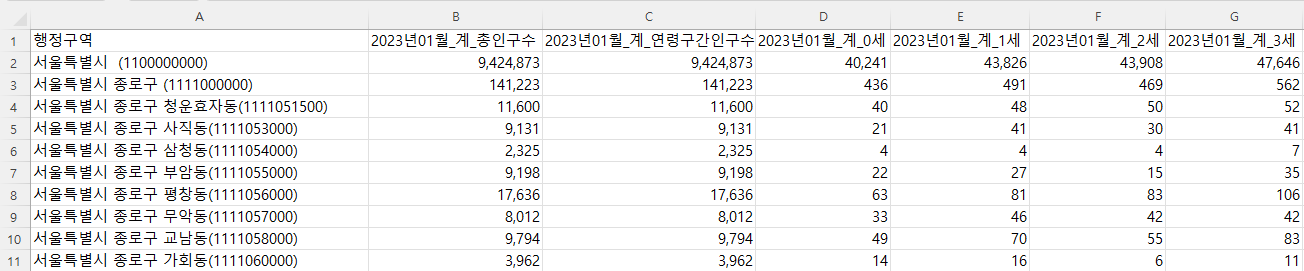

`0세`부터 `100세 이상`까지 총 101개 구간의 데이터가 제공되었습니다.

age_xxxx.csv 파일을 구글 드라이브에 올려 놓고 사용할 경우 아래 코드 참고

```python
import csv
f = open('/content/drive/MyDrive/csv/age_202306.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  print(row)
f.close()
```

###3. 우리 동네 인구 구조 시각화 하기

저는 "경기도 화성시 동탄5동"에 살고 있습니다. 제가 살고 있는 동네의 연령대 별 인구수를 보이는 그래프를 그려보겠습니다. 먼저 csv 파일로부터 데이터를 가져오겠습니다.

```python
import csv
f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  print(row)
f.close()
```

각 행 데이터는 리스트 형이고 각 요소는 문자열 형 데이터입니다. 각 행 리스트의 첫 번째 요소가 주소네요. 다소 번거롭지만 위 코드의 출력 결과에서 "경기도 화성시 동탄5동"을 찾아(검색)보니 "경기도 화성시 동탄5동(4159059000)"으로 행정구역 명이 표현되어 있네요. 또는 age_xxxx.csv 파일에서 확인할 수도 있습니다.

```python
import csv
f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)

for row in data:
  if row[0] == '경기도 화성시 동탄5동(4159059000)':
    break

print(row)
f.close()
```

In [2]:
import csv
#f = open('age_202306.csv', encoding='cp949')
f = open('/content/drive/MyDrive/csv/age_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

for row in data:
  if row[0] == '경기도 화성시 동탄5동(4159059000)':
    break

print(row)
f.close()

['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1,021', '1,092', '1,060', '1,102', '1,045', '1,087', '1,042', '999', '1,052', '1,018', '1,148', '1,118', '1,143', '1,069', '906', '890', '876', '765', '737', '709', '696', '659', '661', '537', '555', '485', '445', '433', '398', '375', '390', '367', '416', '385', '332', '334', '287', '250', '323', '255', '194', '187', '145', '180', '153', '154', '118', '91', '105', '99', '107', '89', '68', '60', '45', '53', '45', '35', '32', '24', '23', '19', '10', '9', '7', '4', '6', '0', '0', '0', '5']


`data`에서 거주하고 계신 곳의 데이터를 찾기가 꽤 번거롭습니다. 그래서 위 코드를 조금 수정하겠습니다.

```python
import csv
f = open('age.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  if '화성시 동탄5동' in row[0]:     # Look at me! if ~ in
    print(row)

f.close()
```

In [ ]:
import csv
f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
  if '동탄5동' in row[0]:     # Look at me! if ~ in
    print(row)

f.close()

['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1,021', '1,092', '1,060', '1,102', '1,045', '1,087', '1,042', '999', '1,052', '1,018', '1,148', '1,118', '1,143', '1,069', '906', '890', '876', '765', '737', '709', '696', '659', '661', '537', '555', '485', '445', '433', '398', '375', '390', '367', '416', '385', '332', '334', '287', '250', '323', '255', '194', '187', '145', '180', '153', '154', '118', '91', '105', '99', '107', '89', '68', '60', '45', '53', '45', '35', '32', '24', '23', '19', '10', '9', '7', '4', '6', '0', '0', '0', '5']


위 코드의 출력 결과를 보면 리스트의 첫 번째 요소는 '행정구역(이름)'이고 4번째(인덱스 3)부터 0세 어린이 수, 1세 어린이 수, ... 100세 이상 수 데이터입니다. 제가 사는 동네의 연령 대 별 인구수를 추출하는 코드를 만들겠습니다.

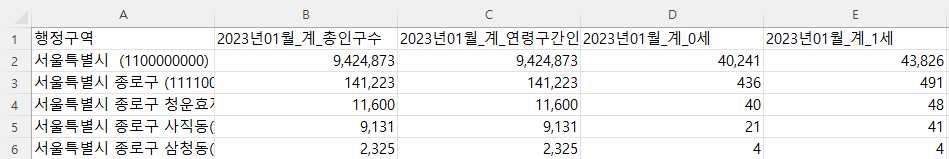


코랩에서 한글 사용을 위해 필요한 모듈을 설치합니다.

In [6]:
# 코랩에서 한글 사용을 위해
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 543.3 kB/s eta 0:00:00


원하는 지역에 대한 데이터를 찾았을 경우 `for` 루프를 빠져나오도록 코드를 수정했습니다.

In [7]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 파일에서 데이터 가져오기
#f = open('age_202306.csv', encoding='cp949')
f = open('/content/drive/MyDrive/csv/age_202306.csv', encoding='cp949')
data = csv.reader(f)
# 가져온 데이터에서 첫번째 행(header) 제거
next(data)

# 순수 데이터만 남은 data에서 각 '행 데이터'를 순회하면서
# 주소의 값에 '경기도 화성시 동탄5동'이라는 문자열이 있는지 조사
for row in data:
  if '경기도 화성시 동탄5동' in row[0]:
    # 원하는 지역을 찾았다면 == 원하는 지역의 (행) 데이터를 찾았다면
    # 해당 지역의 데이터를 출력 후 for 반복문 종료
    print(row)
    break

f.close()

['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1,021', '1,092', '1,060', '1,102', '1,045', '1,087', '1,042', '999', '1,052', '1,018', '1,148', '1,118', '1,143', '1,069', '906', '890', '876', '765', '737', '709', '696', '659', '661', '537', '555', '485', '445', '433', '398', '375', '390', '367', '416', '385', '332', '334', '287', '250', '323', '255', '194', '187', '145', '180', '153', '154', '118', '91', '105', '99', '107', '89', '68', '60', '45', '53', '45', '35', '32', '24', '23', '19', '10', '9', '7', '4', '6', '0', '0', '0', '5']


```python
population = []

for p in row[3:]:
  population.append( int( p.replace(',','') ) )
```

```python
plt.figure(figsize=(16,9))
plt.plot(population)
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수(경기도 화성시 동탄5동)')
plt.grid()
plt.show()
```


경기도 화성시 동탄5동은 [여기](https://map.naver.com/v5/search/%EA%B2%BD%EA%B8%B0%EB%8F%84%20%ED%99%94%EC%84%B1%EC%8B%9C%20%EB%8F%99%ED%83%845%EB%8F%99/address/14149140.479623463,4468461.356938964,%EA%B2%BD%EA%B8%B0%EB%8F%84%20%ED%99%94%EC%84%B1%EC%8B%9C%20%EB%8F%99%ED%83%845%EB%8F%99,adm?c=14.08,0,0,0,dh&isCorrectAnswer=true)입니다.


#####Quiz
여러 분이 살고 있는 동네(동)의 연령대 별 인구 수를 그래프로 그리는 코드를 작성해 보세요. 행정구역(이름) 즉 동이름을  입력하면 해당 동의 연령대 별 인구 수를 보여주는 그래프를 출력하는 코드를 작성해 보십시요.




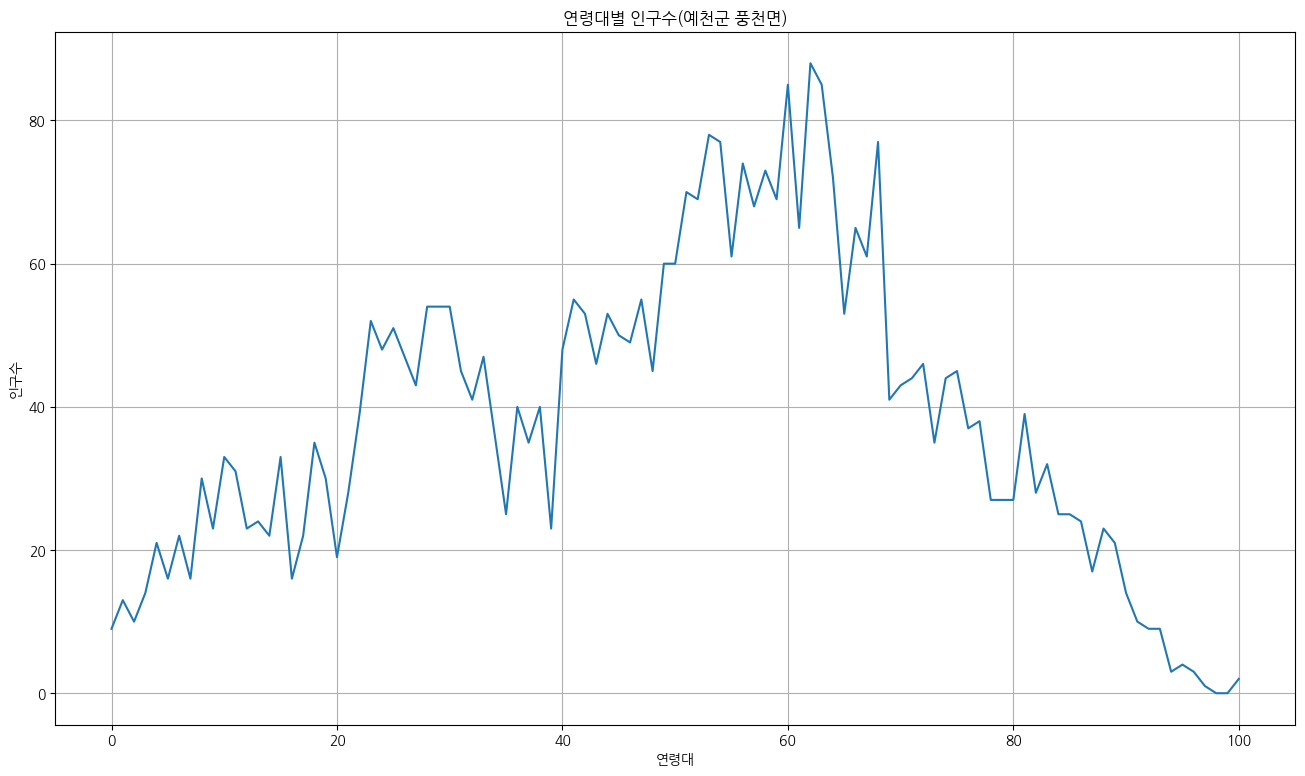

In [8]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

addr = '예천군 풍천면'
# 파일에서 데이터 가져오기
#f = open('age_202306.csv', encoding='cp949')
f = open('/content/drive/MyDrive/csv/age_202306.csv', encoding='cp949')
data = csv.reader(f)

# 가져온 데이터에서 첫번째 행(header) 제거
next(data)

# 순수 데이터만 남은 data에서 각 '행 데이터'를 순회하면서
# 주소의 값에 '경기도 화성시 동탄5동'이라는 문자열이 있는지 조사
for row in data:
  if addr in row[0]:
    # 원하는 지역을 찾았다면 == 원하는 지역의 (행) 데이터를 찾았다면
    # 해당 지역의 데이터를 출력 후 for 반복문 종료
    print(row)
    break
f.close()

population = []

for p in row[3:]:
  population.append( int( p.replace(',','') ) )

plt.figure(figsize=(16,9))
plt.plot(population)
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수({})'.format(addr))
plt.grid()
plt.show()

어디야? : 동탄5동
['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1,021', '1,092', '1,060', '1,102', '1,045', '1,087', '1,042', '999', '1,052', '1,018', '1,148', '1,118', '1,143', '1,069', '906', '890', '876', '765', '737', '709', '696', '659', '661', '537', '555', '485', '445', '433', '398', '375', '390', '367', '416', '385', '332', '334', '287', '250', '323', '255', '194', '187', '145', '180', '153', '154', '118', '91', '105', '99', '107', '89', '68', '60', '45', '53', '45', '35', '32', '24', '23', '19', '10', '9', '7', '4', '6', '0', '0', '0', '5']


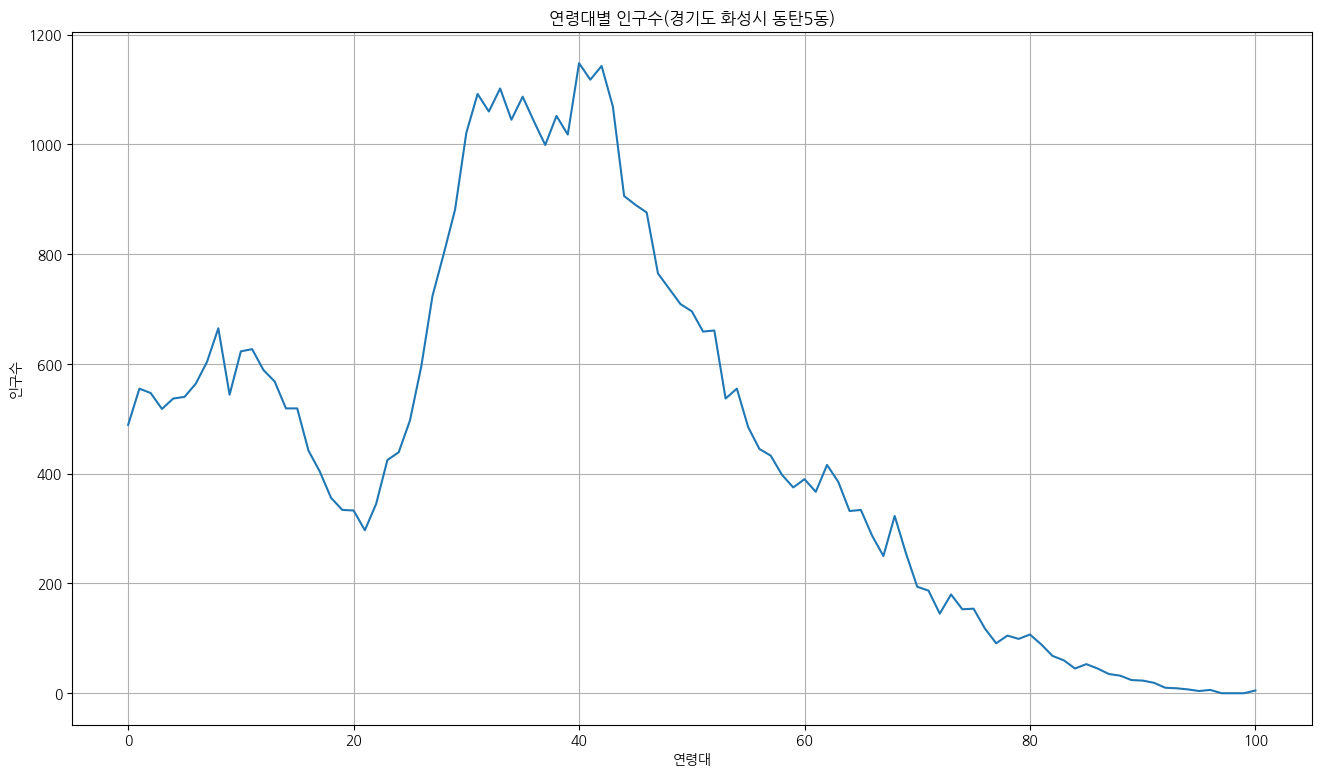

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 파일에서 데이터 가져오기
f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)

# 가져온 데이터에서 첫번째 행(header) 제거
next(data)

name = input('어디야? : ')
for row in data:
  if name in row[0]:
    # 원하는 지역을 찾았다면 == 원하는 지역의 (행) 데이터를 찾았다면
    # 해당 지역의 데이터를 출력 후 for 반복문 종료
    print(row)
    break
f.close()

population = []

for p in row[3:]:
  population.append( int( p.replace(',','') ) )

plt.figure(figsize=(16,9))
plt.plot(population)
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수(경기도 화성시 동탄5동)')
plt.grid()
plt.show()

['경기도 용인시 기흥구 동백2동(4146357500)', '26,840', '26,840', '71', '78', '90', '124', '149', '181', '226', '314', '312', '405', '426', '417', '441', '461', '471', '546', '489', '423', '419', '426', '363', '347', '416', '394', '364', '390', '321', '298', '281', '245', '217', '207', '158', '159', '177', '184', '189', '227', '256', '310', '318', '451', '537', '543', '560', '598', '596', '603', '645', '650', '614', '671', '692', '596', '527', '464', '429', '366', '304', '272', '319', '262', '279', '232', '238', '206', '219', '184', '197', '178', '169', '156', '120', '137', '149', '154', '152', '117', '117', '93', '105', '96', '94', '81', '64', '63', '51', '55', '35', '25', '16', '19', '10', '14', '2', '6', '6', '5', '3', '1', '3']


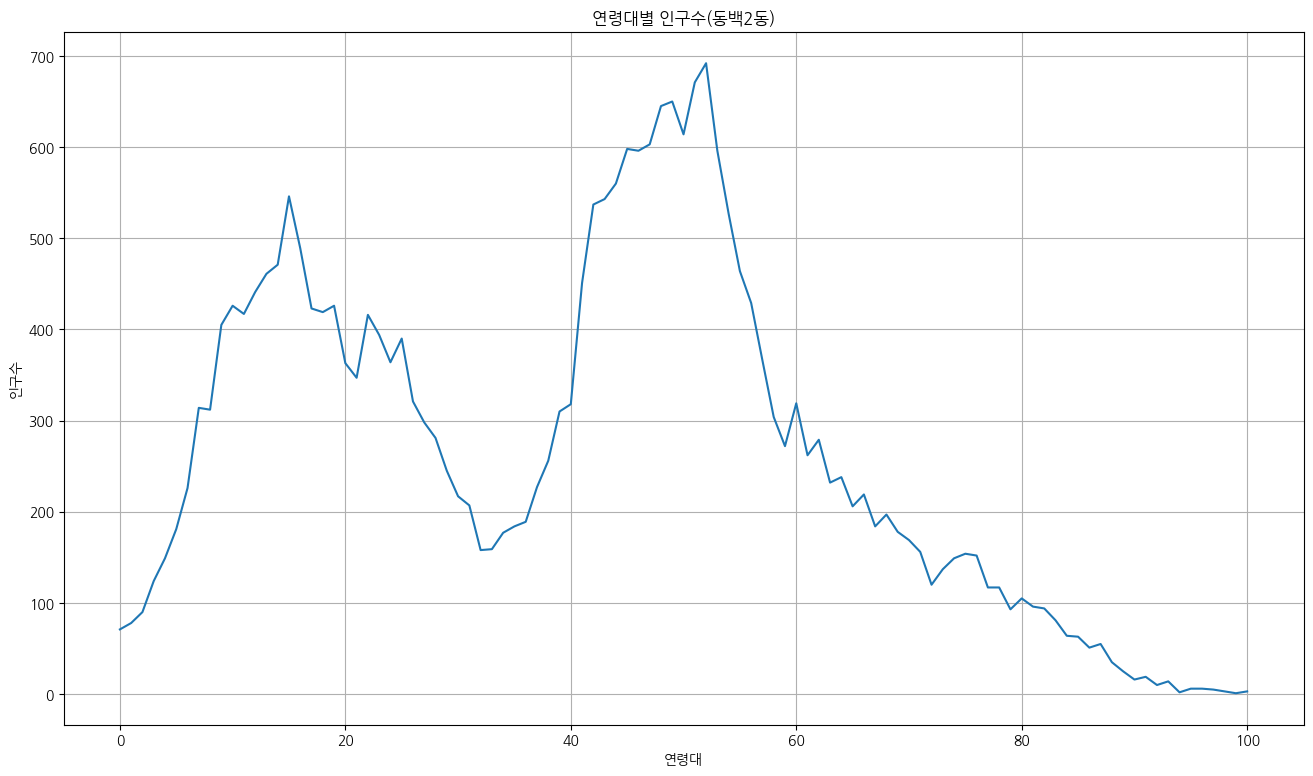

['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1,021', '1,092', '1,060', '1,102', '1,045', '1,087', '1,042', '999', '1,052', '1,018', '1,148', '1,118', '1,143', '1,069', '906', '890', '876', '765', '737', '709', '696', '659', '661', '537', '555', '485', '445', '433', '398', '375', '390', '367', '416', '385', '332', '334', '287', '250', '323', '255', '194', '187', '145', '180', '153', '154', '118', '91', '105', '99', '107', '89', '68', '60', '45', '53', '45', '35', '32', '24', '23', '19', '10', '9', '7', '4', '6', '0', '0', '0', '5']


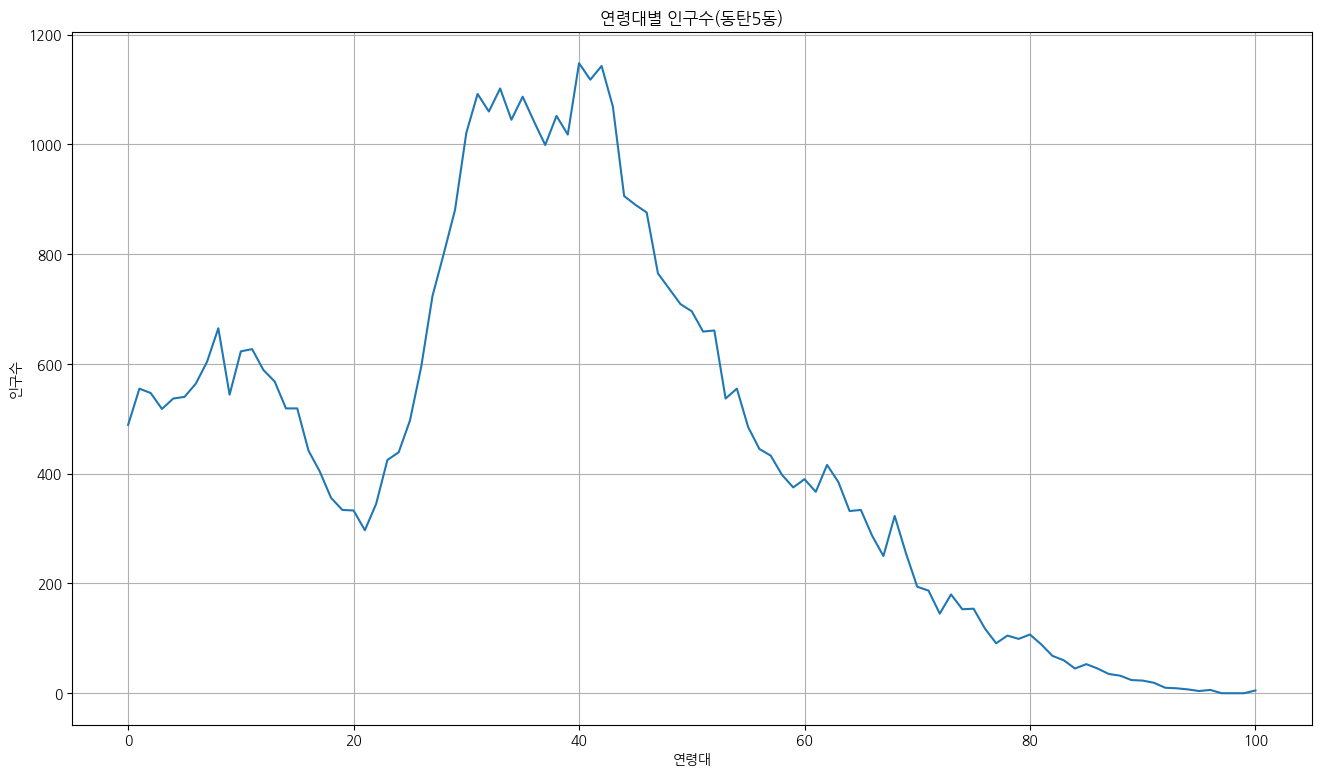

KeyboardInterrupt: ignored

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib
import time

# 파일에서 데이터 가져오기
f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)

# 가져온 데이터에서 첫번째 행(header) 제거
next(data)
data = list(data)

while True:
  addr = input('어디야? : ')
  if addr == 'q' or addr == 'Q':
    break

  for row in data:
    if addr in row[0]:
      # 원하는 지역을 찾았다면 == 원하는 지역의 (행) 데이터를 찾았다면
      # 해당 지역의 데이터를 출력 후 for 반복문 종료
      print(row)
      break


  population = []

  for p in row[3:]:
    population.append( int( p.replace(',','') ) )

  plt.figure(figsize=(16,9))
  plt.plot(population)
  plt.xlabel('연령대')
  plt.ylabel('인구수')
  plt.title('연령대별 인구수({})'.format(addr))
  plt.grid()
  plt.show()
  time.sleep(3)
  plt.close()

f.close()

In [ ]:
import csv

f = open('age.csv', encoding='cp949')
data = csv.reader(f)

count = 0
for row in data:
  count +=1
print(count)

count = 0
for row in data:
  count +=1
print(count)

type(data)

3875
0


_csv.reader

In [ ]:
print('before')
count = 0
for x in []:
  count += 1

print(count)
print('after')

before
0
after


In [ ]:
lst = [1, 2, 3]
for x in lst:
  print(x)

print(lst)

1
2
3
[1, 2, 3]


위 코드를 실행시켜 보면 첫번째 `print()` 함수의 출력 값은 3875이고 두 번째 `print()` 함수의 출력 값은 0입니다. 출력 결과를 보고 미루어 짐작하건데, 아래 코드를 실행하면 `data`의 요소가 순회 할 때 마다 하나씩 소진(삭제)된다는 것을 확인할 수 있습니다.

```python
for row in data:
  count += 1
```
그렇기 때문에 두번째 `for`에서 `data` 내부에서 꺼내올 데이터가 없기 때문에 순회가 발생하지 않았고 따라서 두번째 `print()`함수의 출력은 0인 것입니다.


`csv.reader()` 함수가 반환한 `data`를 리스트(list)로 변환하여 처리하겠습니다.

어느 동(행정구역) 정보를 알고 싶으세요? 행정구역 이름 또는 동명을 입력해주세요 동탄10동
입력하신 행정구역 이름 또는 동 이름이 검색되지 않습니다. 다시 입력해주세요
어느 동(행정구역) 정보를 알고 싶으세요? 행정구역 이름 또는 동명을 입력해주세요 동탄5동


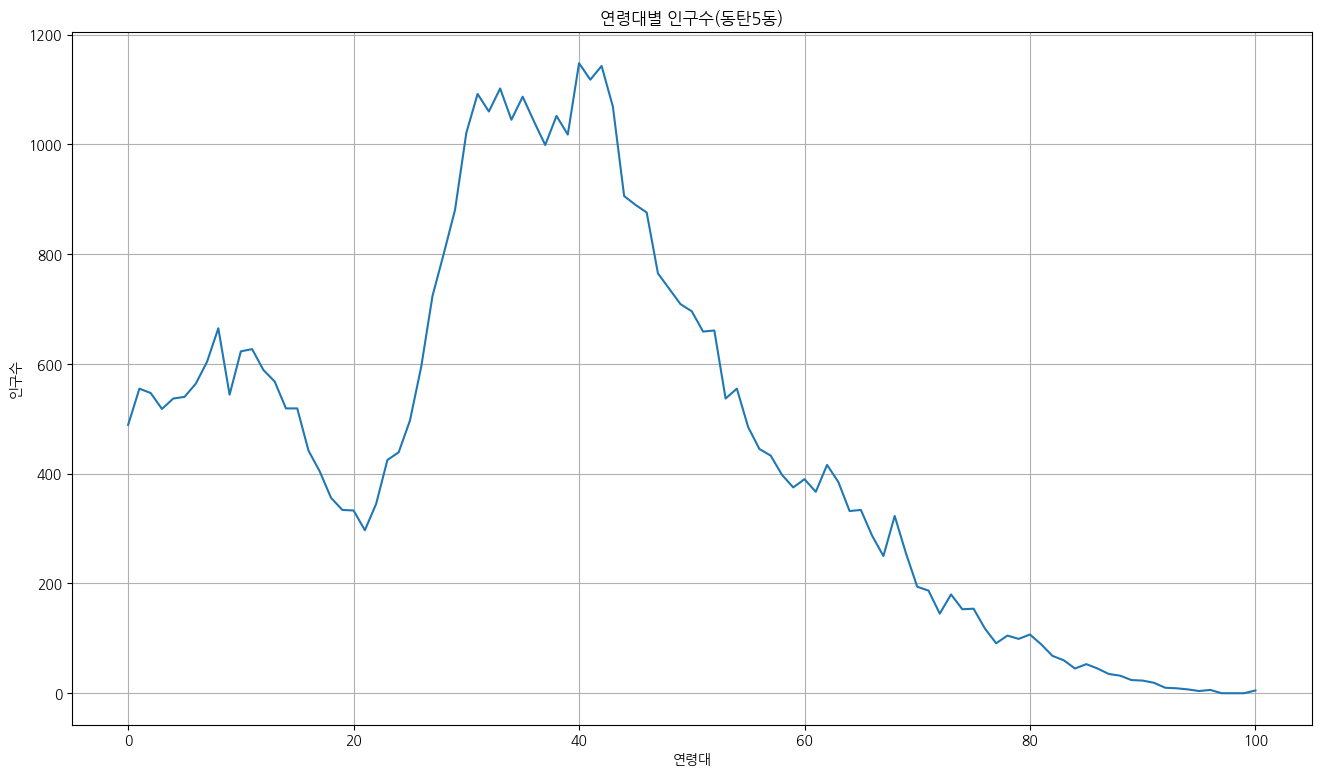

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)
############################################################
data = list(data)
############################################################
f.close()

count = 0

while True:
  name = input('어느 동(행정구역) 정보를 알고 싶으세요? 행정구역 이름 또는 동명을 입력해주세요 ')
  for row in data:
    if name in row[0]:
      count += 1
      my_town_data = row

  if count == 0:
    print('입력하신 행정구역 이름 또는 동 이름이 검색되지 않습니다. 다시 입력해주세요')
  elif count == 1:
    break
  else:
    print('입력하신 행정구역 이름 또는 동 이름이 {}개 이상 검색되었습니다. 다시 입력해주세요'.format(count))
    count = 0
    lst = []



population = []
for p in my_town_data[3:]:
  population.append( int( p.replace(',','') ) )

plt.figure(figsize=(16,9))
plt.plot(population)
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수({})'.format(name))
plt.grid()
plt.show()

`csv.reader()` 함수가 반환한 값을 `data`에 넣고 다시 그 `data`를 리스트 형으로 변환했습니다. 리스트 형으로 변환된 `data`의 구조에 대해 생각해 보겠습니다.

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

ndata = list(data)
d = ndata[2]

print(d[0])
print(ndata[2][0])

서울특별시 종로구 청운효자동(1111051500)
서울특별시 종로구 청운효자동(1111051500)


`data`는 리스트 형이고 각 요소 또한 리스트 형입니다. 각 요소는 특정 지역의 인구 분포 정보를 가지고 있습니다.

###<font color=blue>Quiz</font>
관심 지역(동) 두 곳의 인구 분포를 비교하려고 합니다. 하나의 그림(figure)에 두 지역의 인구 분포 그래프를 그려보세요.  

1) 경기도 용인시 기흥구 [동백2동](https://map.naver.com/v5/search/%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%9A%A9%EC%9D%B8%EC%8B%9C%20%EA%B8%B0%ED%9D%A5%EA%B5%AC%20%EB%8F%99%EB%B0%B12%EB%8F%99/address/14154464.111631673,4477152.674244959,%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%9A%A9%EC%9D%B8%EC%8B%9C%20%EA%B8%B0%ED%9D%A5%EA%B5%AC%20%EB%8F%99%EB%B0%B12%EB%8F%99,adm?c=13,0,0,0,dh&isCorrectAnswer=true)  
2) 경기도 화성시 [동탄5동](https://map.naver.com/v5/search/%EA%B2%BD%EA%B8%B0%EB%8F%84%20%ED%99%94%EC%84%B1%EC%8B%9C%20%EB%8F%99%ED%83%845%EB%8F%99/address/14149140.479623463,4468461.356938964,%EA%B2%BD%EA%B8%B0%EB%8F%84%20%ED%99%94%EC%84%B1%EC%8B%9C%20%EB%8F%99%ED%83%845%EB%8F%99,adm?c=12,0,0,0,dh&isCorrectAnswer=true)

['경기도 용인시 기흥구 동백2동(4146357500)', '26,840', '26,840', '71', '78', '90', '124', '149', '181', '226', '314', '312', '405', '426', '417', '441', '461', '471', '546', '489', '423', '419', '426', '363', '347', '416', '394', '364', '390', '321', '298', '281', '245', '217', '207', '158', '159', '177', '184', '189', '227', '256', '310', '318', '451', '537', '543', '560', '598', '596', '603', '645', '650', '614', '671', '692', '596', '527', '464', '429', '366', '304', '272', '319', '262', '279', '232', '238', '206', '219', '184', '197', '178', '169', '156', '120', '137', '149', '154', '152', '117', '117', '93', '105', '96', '94', '81', '64', '63', '51', '55', '35', '25', '16', '19', '10', '14', '2', '6', '6', '5', '3', '1', '3']
['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1,021', '1,

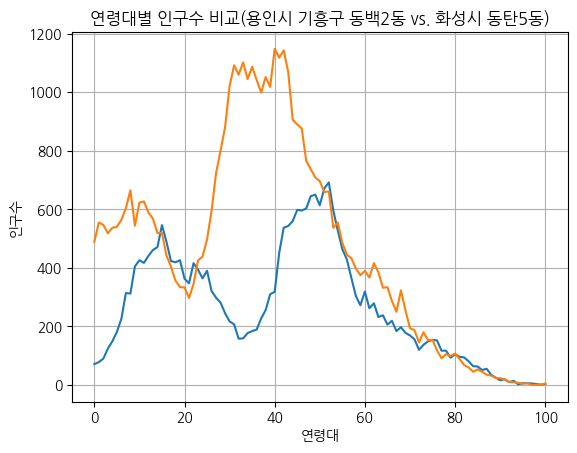

In [ ]:
# 위 Quiz에 대한 코드 1
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

data = list(data)

# 동백2동에 부터 조사 ---------------------------
for row in data:
  if '동백2동' in row[0]:
    print(row)
    break

population = []

for p in row[3:]:
  population.append( int( p.replace(',','') ) )

#print(population)
plt.plot(range(0, 101), population)
# -----------------------------------------------

# 동탄5동 조사 ----------------------------------
for row in data:
  if '동탄5동' in row[0]:
    print(row)
    break

population = []

for p in row[3:]:
  population.append( int( p.replace(',','') ) )

#print(population)
plt.plot(range(0, 101), population)
# ----------------------------------------------


plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수 비교(용인시 기흥구 동백2동 vs. 화성시 동탄5동)')
plt.grid()
plt.show()
f.close()

동백2동
['경기도 용인시 기흥구 동백2동(4146357500)', '26,840', '26,840', '71', '78', '90', '124', '149', '181', '226', '314', '312', '405', '426', '417', '441', '461', '471', '546', '489', '423', '419', '426', '363', '347', '416', '394', '364', '390', '321', '298', '281', '245', '217', '207', '158', '159', '177', '184', '189', '227', '256', '310', '318', '451', '537', '543', '560', '598', '596', '603', '645', '650', '614', '671', '692', '596', '527', '464', '429', '366', '304', '272', '319', '262', '279', '232', '238', '206', '219', '184', '197', '178', '169', '156', '120', '137', '149', '154', '152', '117', '117', '93', '105', '96', '94', '81', '64', '63', '51', '55', '35', '25', '16', '19', '10', '14', '2', '6', '6', '5', '3', '1', '3']
동탄5동
['경기도 화성시 동탄5동(4159059000)', '46,410', '46,410', '489', '555', '547', '518', '537', '540', '564', '604', '665', '544', '623', '627', '589', '568', '519', '519', '442', '404', '356', '334', '333', '297', '345', '425', '439', '497', '595', '724', '801', '881', '1

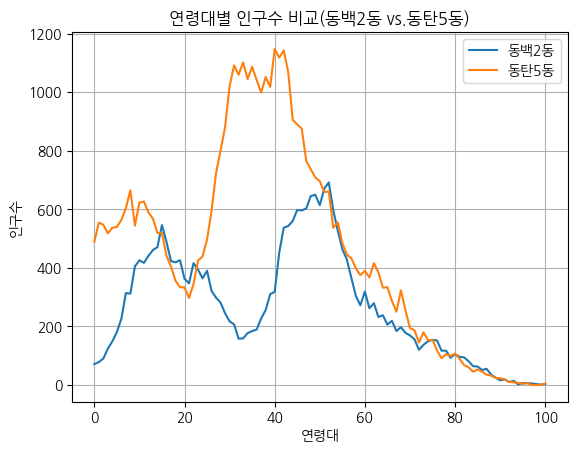

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

def getData(dong, data):
  print(dong)
  for row in data:
    if dong in row[0]:
      print(row)
      break

  population = []
  for p in row[3:]:
    population.append( int( p.replace(',','') ) )

  return population

f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

dongs = ['동백2동', '동탄5동']
plt.plot(getData(dongs[0], data), label=dongs[0])
plt.plot(getData(dongs[1], data), label=dongs[1])

plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수 비교({} vs.{})'.format(dongs[0], dongs[1]))
plt.legend()
plt.grid()
plt.show()

##UNIT 08 인구 구조를 다양한 형태로 시각화 하기
기존 코드에 한 가지 기능을 추가하겠습니다. 위 코드를 실행한 결과로 얻은 그래프에서 x 축 눈금을 보면 20단위로 표시되어 있습니다. x 축의 의미가 나이이므로 눈금을 10단위로 표시하는 것이 조금더 보기 편할 것 같습니다.

위 코드에 두 줄이 추가 되었는데 확인하시기 바랍니다.

어느 동(행정구역) 정보를 알고 싶으세요? 행정구역 이름 또는 동명을 입력해주세요 동탄5동


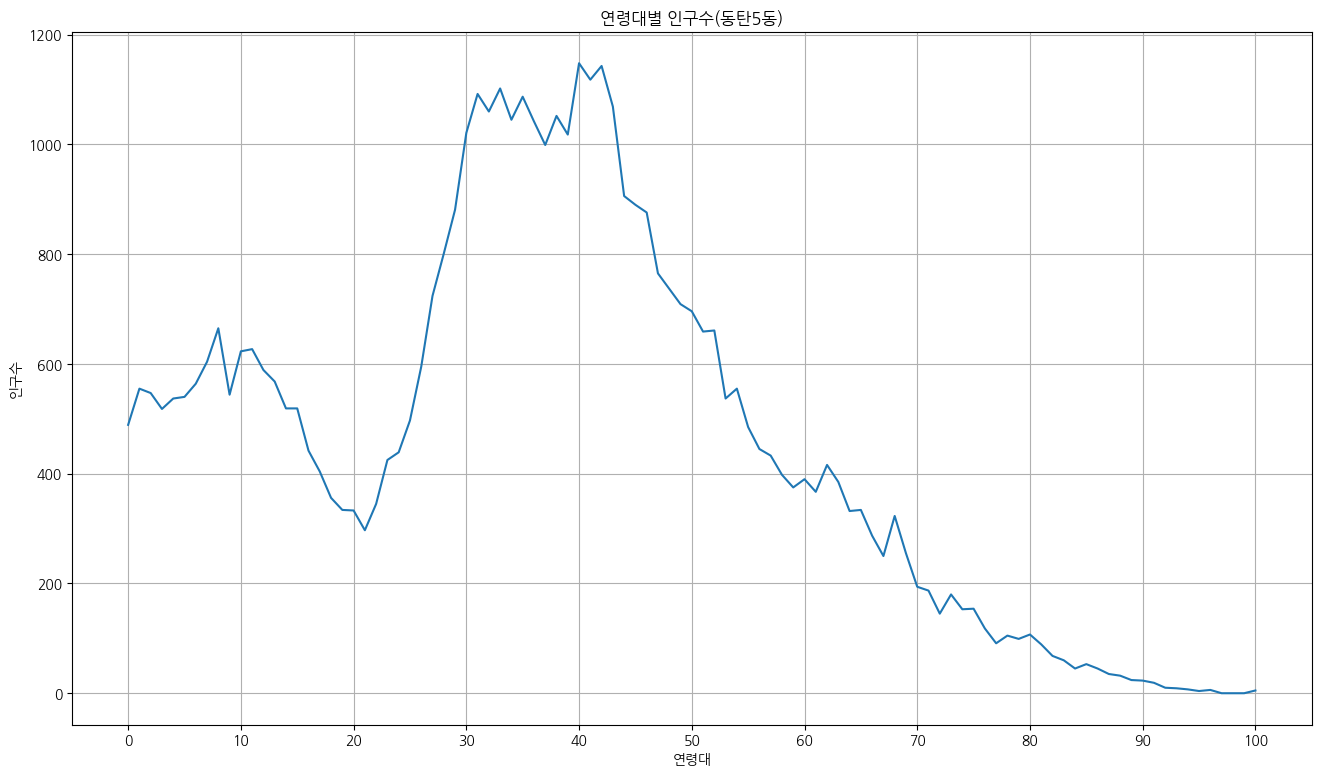

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('age_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)
############################################################
data = list(data)
############################################################
f.close()

count = 0

while True:
  name = input('어느 동(행정구역) 정보를 알고 싶으세요? 행정구역 이름 또는 동명을 입력해주세요 ')
  for row in list(data):
    if name in row[0]:
      count += 1
      my_town_data = row

  if count == 0:
    print('입력하신 행정구역 이름 또는 동 이름이 검색되지 않습니다. 다시 입력해주세요')
  elif count == 1:
    break
  else:
    print('입력하신 행정구역 이름 또는 동 이름이 {}개 이상 검색되었습니다. 다시 입력해주세요'.format(count))
    count = 0
    lst = []


population = []
for p in my_town_data[3:]:
  population.append( int( p.replace(',','') ) )

plt.figure(figsize=(16,9))
plt.plot(population)

##### Look at me #####
x_tick = list(range(0, 101, 10))
plt.xticks(x_tick)
######################

plt.xlabel('연령대')
plt.ylabel('인구수')
plt.title('연령대별 인구수({})'.format(name))
plt.grid()
plt.show()

###1. 막대 그래프 그리기

###bar() 함수
```python
bar(막대를 표시할 위치, 막대의 높이)
```

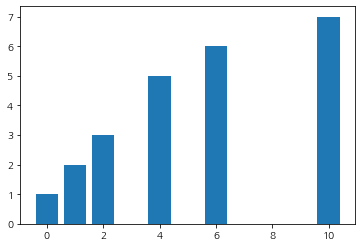

In [ ]:
import matplotlib.pyplot as plt
plt.bar([0, 1, 2, 4, 6, 10], [1, 2, 3, 5, 6, 7])
plt.show()

막대를 표시할 위치 데이터는 ```[0, 1, 2, 3, 4, 5]```이고 막대의 높이 데이터는 ```[10, 20, 5, 30, 25, 40]```이라고 가정하고 막대 그래프를 그려보겠습니다.

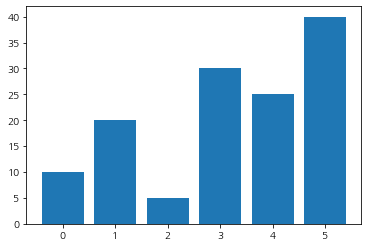

In [ ]:
import matplotlib.pyplot as plt
plt.bar([0, 1, 2, 3, 4, 5], [10, 20, 5, 30, 25, 40])
plt.show()

위 코드를 아래와 같이 ```range()``` 함수를 사용하여 다시 작성할 수 있습니다.

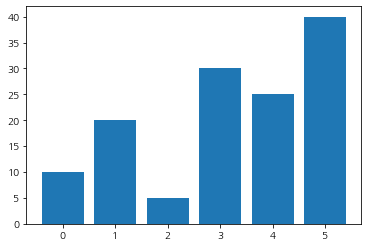

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(6), [10, 20, 5, 30, 25, 40])
plt.show()

이제 우리 동네의 인구 구조를 막대 그래프로 표현해 봅시다.

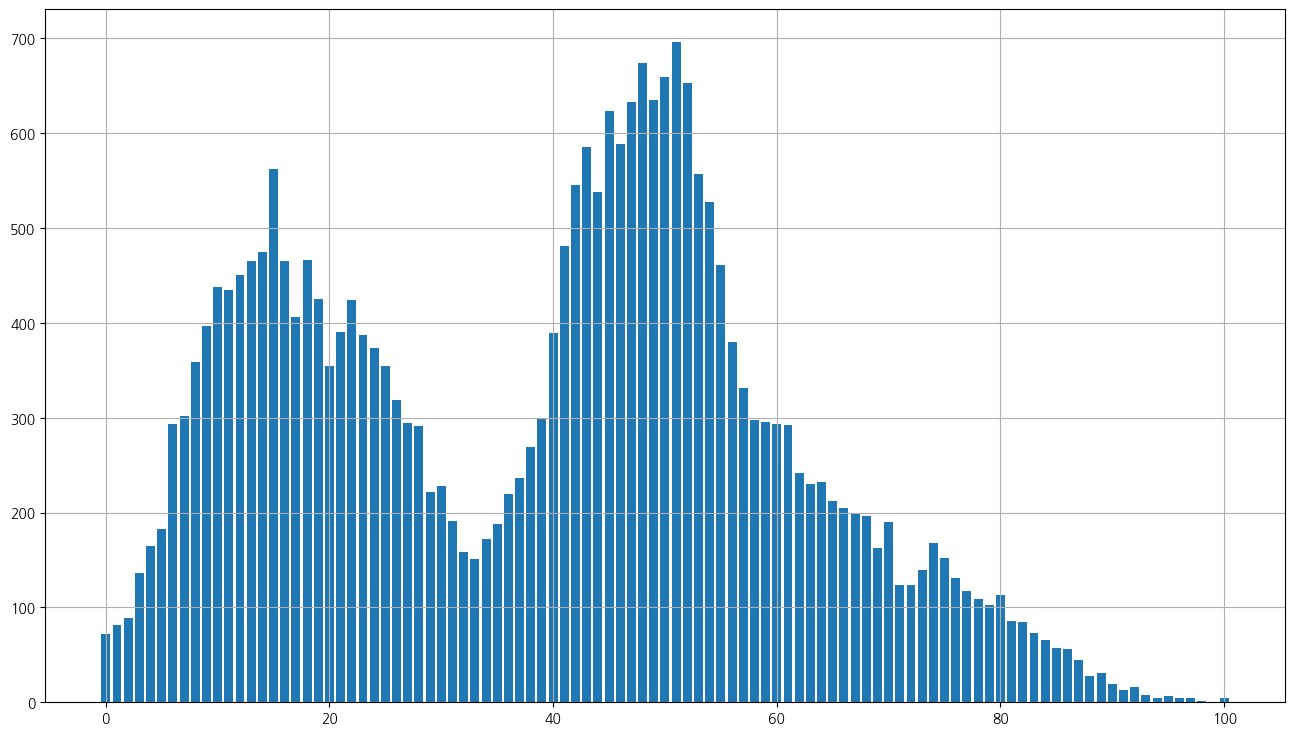

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)

population =[]

for row in data:
  if '동백2동' in row[0]:
    for number in row[3:]:
      population.append( int(number.replace(',','')) )
    break

f.close()

plt.figure(figsize=(16,9))
plt.bar(range(101), population)
plt.grid()
plt.show()

###barh() 함수
앞에서는 ```bar()```함수를 사용하였고 아래 코드에서는 ```barh()```함수로 막대 그래프를 그렸습니다.

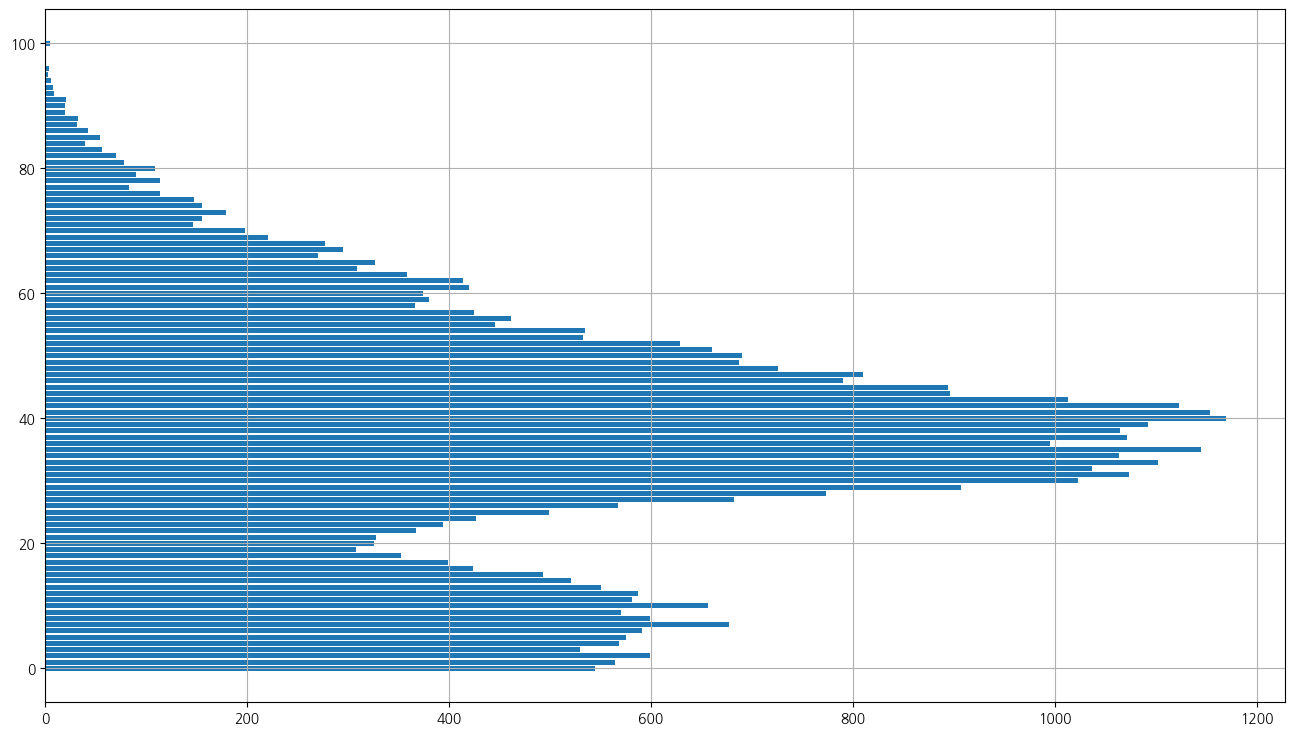

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)

population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:]:
      population.append( int(number.replace(',','')) )
    break

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(101), population)
plt.grid()
plt.show()

###2. 항아리 모양 그래프 그리기
현재 우리가 가진 데이터는 연령대 별 인구수 정보를 가지고 있지만 성별 구분이 되어 있지 않습니다. 성별 구분이 되어 있는 인구 데이터가 있으면 좋겠습니다. [행정안전부 홈페이지](http://www.mois.go.kr)에서 데이터 파일을 받아오겠습니다.

메인 뉴에서 **정책자료/통계/주민등록 인구통계**로 이동합니다. **연령별 인구현황**을 선택합니다. **통계표** 탭에서 아래와 같이 선택합니다. 조회기간은 2023년 1월, 구분은 남여 구분, 연령 구분 단위는 10세, 만 연령구분은 0~100이상으로 설정 후 검색 버튼을 누릅니다. 다음으로 '전체읍면동현황'를 선택하고 'csv파일 다운로드'를 클릭합니다.

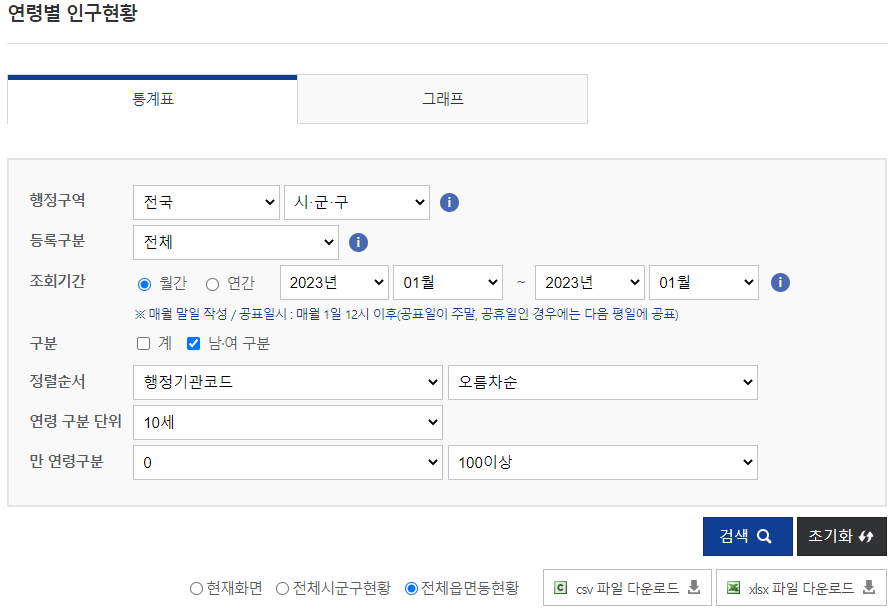





다운로드 받은 csv 파일의 이름을 'gender'로 변경하여 저장합니다. gender.csv 파일을 excel로 열어 보면 아래와 같습니다.
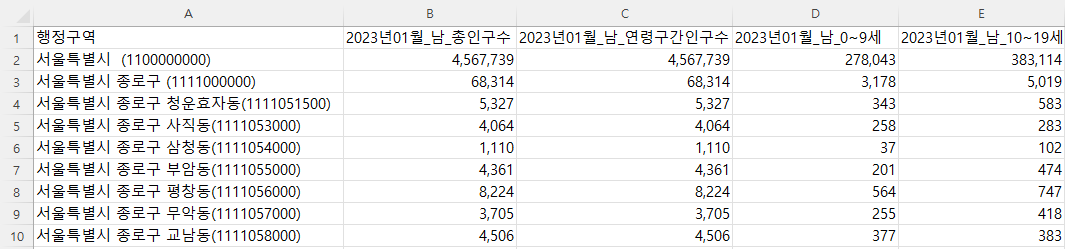

A 컬럼에는 행정구역, B 컬럼에는 해당 행정구역에 거주 중인 남성 총인구수 D 컬럼에는 **0~9세**의 남자 인구수 그리고 E 컬럼에는 **10~19세** 남자 인구수를 보이고 있습니다. 이 파일의 O 컬럼에는 해당 행정구역에 거주 중인 여성 총인구수가 기록되어 있으며 Q 컬럼에는 **0~9세** 여자 인구수, R 컬럼에는 **10~19세** 여성 인구수가 기록되어 있습니다.

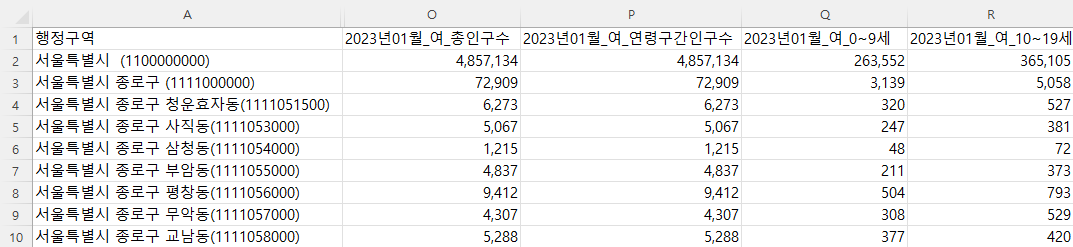

이 csv 파일에서 데이터를 어떻게 추출할 것인지 생각해 보겠습니다. 먼저 연령대별 남자수 정보를 어떻게 추출하면 될까요? A컬럼은 인텍스 0, B 컬럼은 인텍스 1이므로 0\~9세 남자 인구수 정보는 D컬럼에 있으니 인덱스 3부터 정보를 추출하면 되겠습니다.
그리고 추출해야 하는 정보는 0\~9세, 10\~19세, ..., 90\~99세, 100세 이상으로 총 11개 컬럼으로부터 가져오면 되겠습니다. 인텍스 3부터 인덱스 13까지(```range(3:14)```)의 정보를 가져오면 되겠습니다.
연령대별 남자 인구수 정보를 추출하는 코드를 작성해 보겠습니다.


In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

['행정구역',
 '2023년01월_남_총인구수',
 '2023년01월_남_연령구간인구수',
 '2023년01월_남_0~9세',
 '2023년01월_남_10~19세',
 '2023년01월_남_20~29세',
 '2023년01월_남_30~39세',
 '2023년01월_남_40~49세',
 '2023년01월_남_50~59세',
 '2023년01월_남_60~69세',
 '2023년01월_남_70~79세',
 '2023년01월_남_80~89세',
 '2023년01월_남_90~99세',
 '2023년01월_남_100세 이상',
 '2023년01월_여_총인구수',
 '2023년01월_여_연령구간인구수',
 '2023년01월_여_0~9세',
 '2023년01월_여_10~19세',
 '2023년01월_여_20~29세',
 '2023년01월_여_30~39세',
 '2023년01월_여_40~49세',
 '2023년01월_여_50~59세',
 '2023년01월_여_60~69세',
 '2023년01월_여_70~79세',
 '2023년01월_여_80~89세',
 '2023년01월_여_90~99세',
 '2023년01월_여_100세 이상']

<font color = blue>아래 코드에서 `for number in row[3:14]`인 부분이 있습니다. `3:14`인 이유를 설명하세요.</font>

```python
man_population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    break
```

```python
f.close()
print(len(man_population))
plt.figure(figsize=(16,9))
plt.barh(range(11), man_population)
plt.title('연령대 별 인구수(남자)')
plt.grid()
plt.show()
```

11


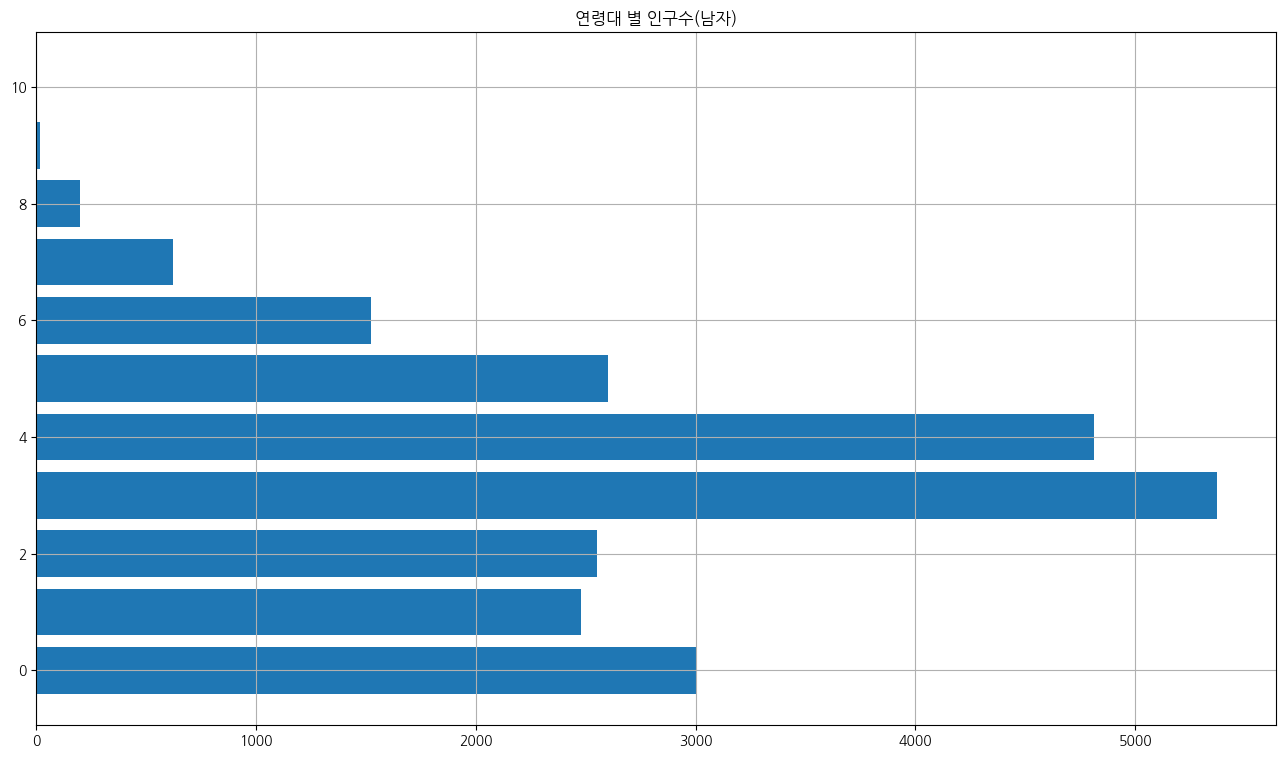

In [ ]:
man_population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    break

f.close()
print(len(man_population))
plt.figure(figsize=(16,9))
plt.barh(range(11), man_population)
plt.title('연령대 별 인구수(남자)')
plt.grid()
plt.show()

연령대별 여자 인구수 데이터도 가져오도록 하겠습니다. gender.csv 파일을 excel로 열어서 데이터 구조를 다시 살펴 보겠습니다. 여자 0~9세 인구수는 Q 컬럼이며 인덱스 16입니다. 인덱스 16부터 인덱스 끝까지 정보를 추출하면 되겠습니다.

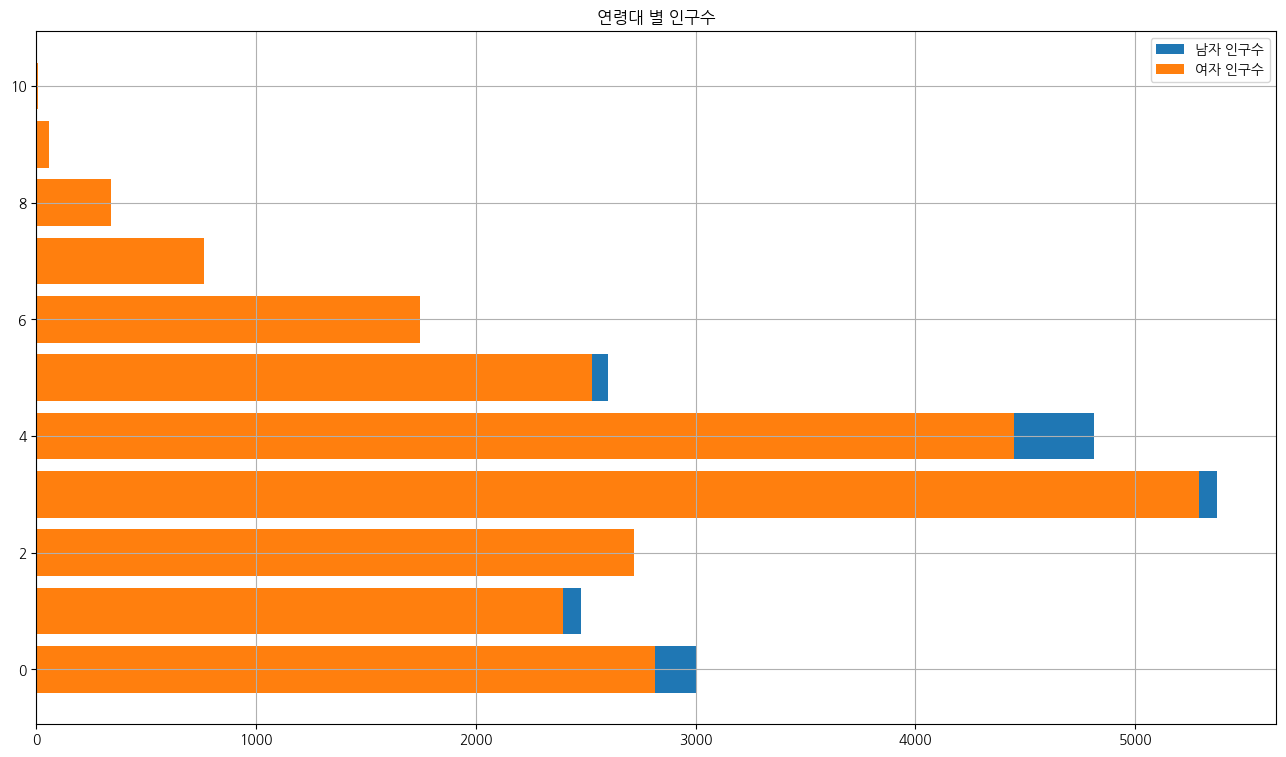

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(11), man_population, label='남자 인구수')
plt.barh(range(11), woman_population, label='여자 인구수')
plt.title('연령대 별 인구수')
plt.legend()
plt.grid()
plt.show()

위 그래프는 현재 다루고 있는 정보를 표현하는데 아쉬운 점이 있네요. 60대의 경우 여자 인구수가 더 많다는 것은 알겠는데, 60대 남자 인구수는 얼마나 되는지 파악할 수 없습니다. 그래프가 겹쳐 그려졌기 때문입니다.

두 그래프가 겹치지 않도록 남성 인구수를 음수로 변경해 보겠습니다.

위 코드에서
```
man_population.append( int(number.replace(',','')) )
```
를 아래와 같이 변경하겠습니다.

```
man_population.append( -1 * int(number.replace(',','')) )
```

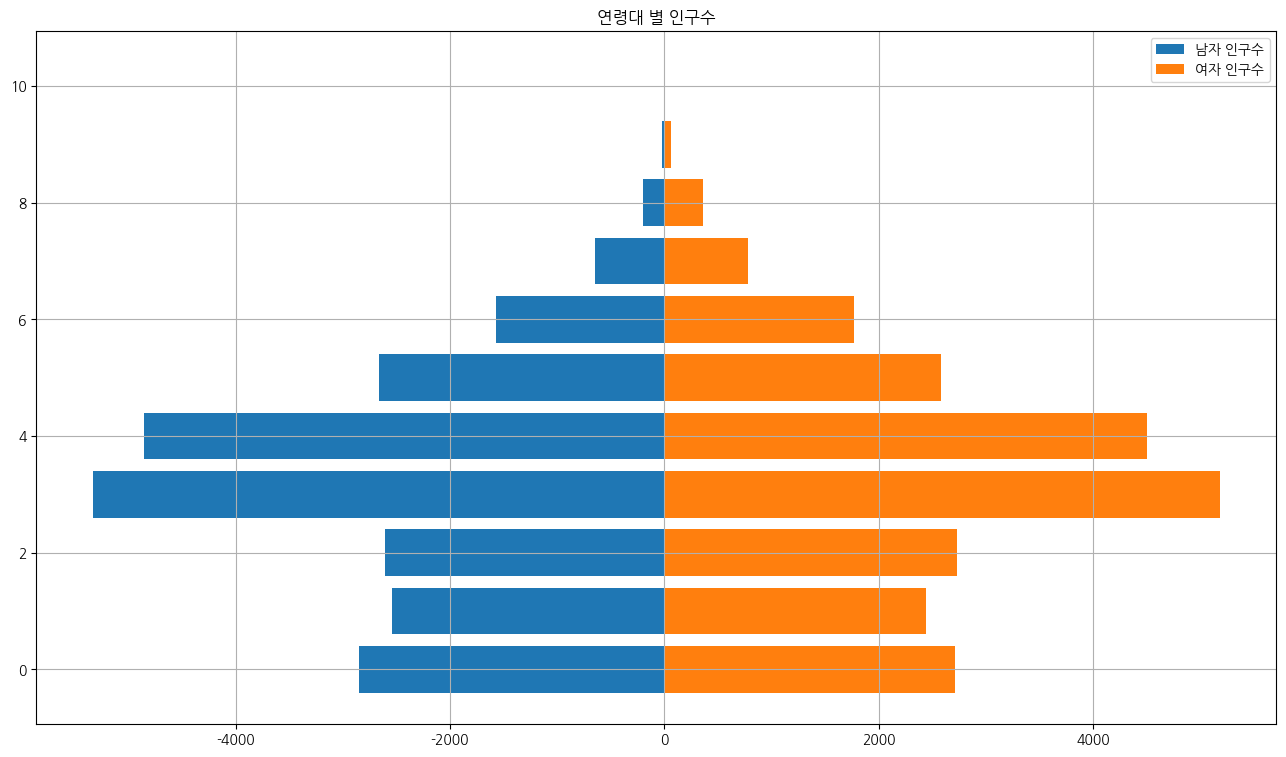

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:14]:
      man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(11), man_population, label='남자 인구수')
plt.barh(range(11), woman_population, label='여자 인구수')
plt.title('연령대 별 인구수')
plt.legend()
plt.grid()
plt.show()

#####참고
위 그래프에서 y축 눈금이 2 단위가 아닌 1단위로 표현되었으면 합니다. 코드를 어떻게 수정하면 좋을까요?

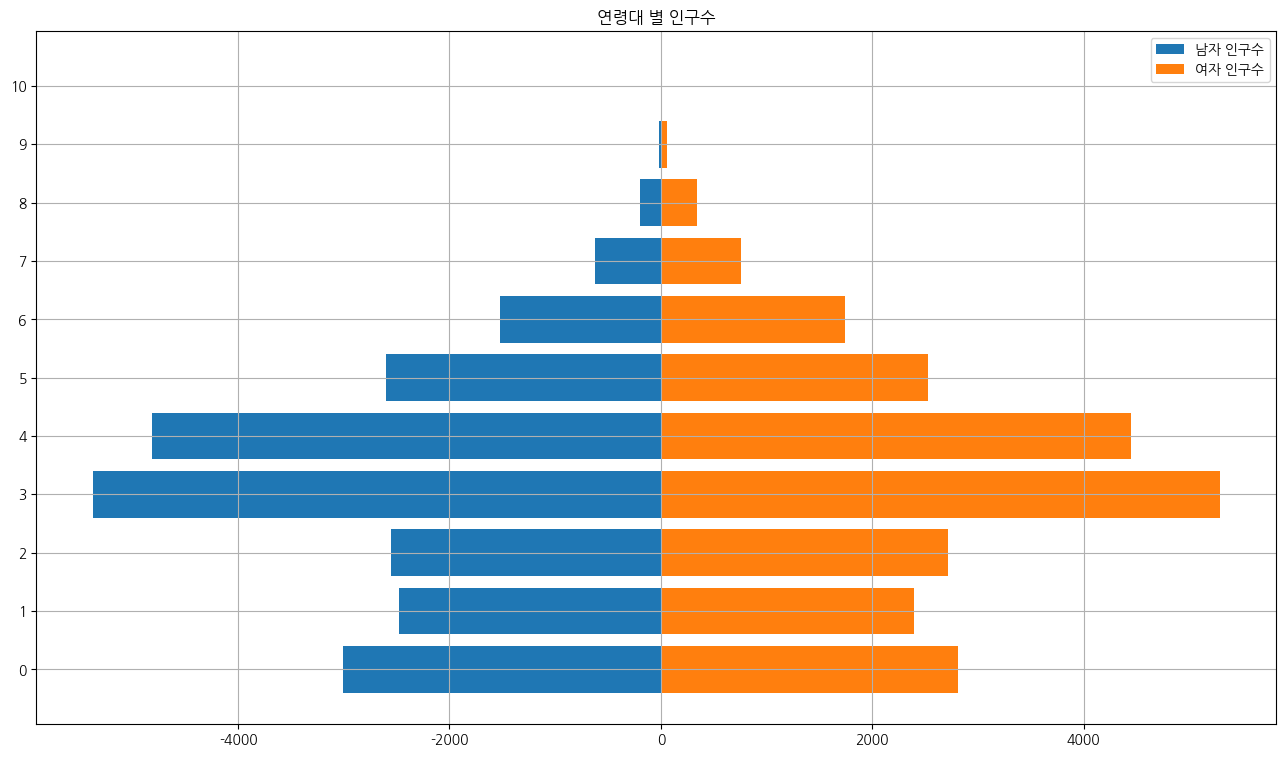

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202307.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:14]:
      man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(11), man_population, label='남자 인구수')
plt.barh(range(11), woman_population, label='여자 인구수')

# --- 이전 코드에 추가한 부분
y_tick = list(range(0, 11))
plt.yticks(y_tick)
# ---------------------------

plt.title('연령대 별 인구수')
plt.legend()
plt.grid()
plt.show()

제가 사는 '경기도 화성시 동탄5동'에는 10대, 20대인 사람이 다른 연령대에 비해 상대적으로 많지 않네요. 회사가 건물이 많은 지역이라 그런가 30대\~40대 사람이 많이 거주하는 것을 알 수 있습니다. 30\~40대 남여 비율도 비슷하네요.

"서울특별시 강남구" 전체의 연령대별 인구 구조는 어떨까요? 여러 분이 살고 계신 동의 인구 구조는 어떨까요?

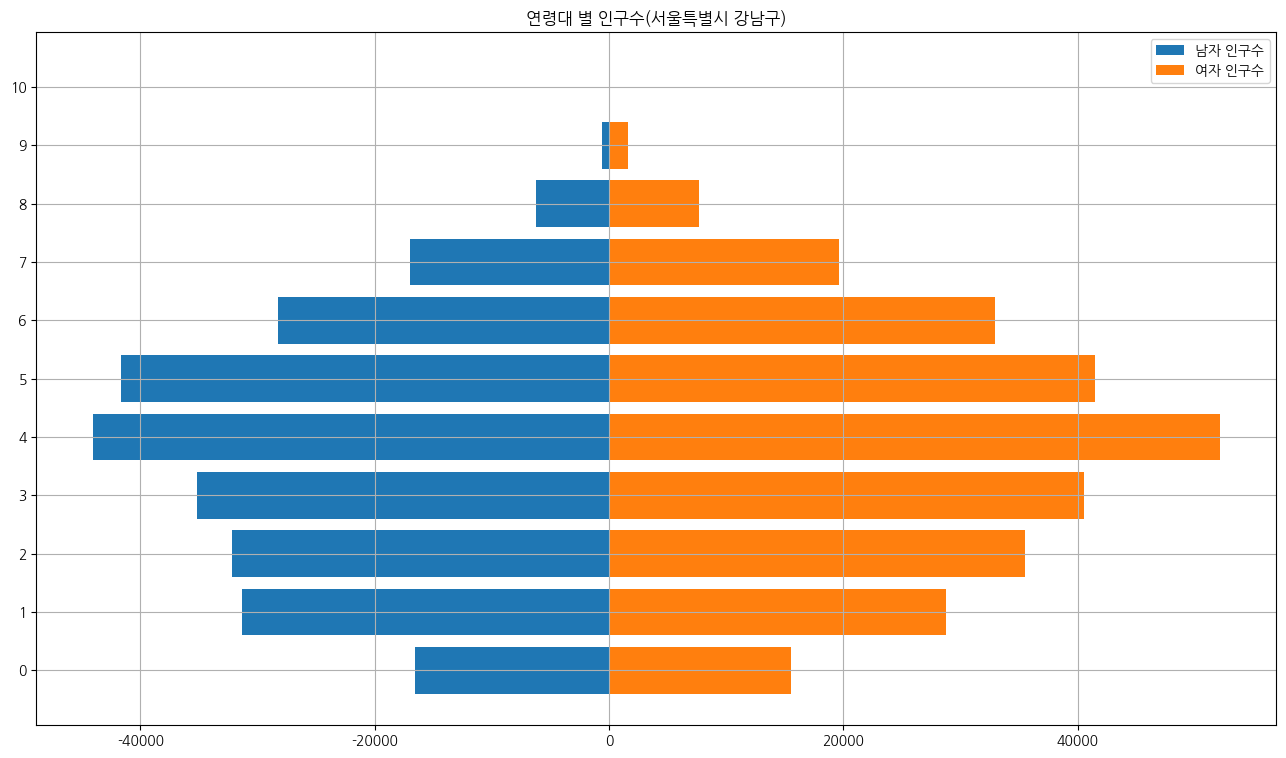

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '서울특별시 강남구 (1168000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(11), man_population, label='남자 인구수')
plt.barh(range(11), woman_population, label='여자 인구수')

# --- 이전 코드에 추가한 부분
y_tick = list(range(0, 11))
plt.yticks(y_tick)
# ---------------------------

plt.title('연령대 별 인구수(서울특별시 강남구)')
plt.legend()
plt.grid()
plt.show()

서울특별시 강남구 인구 구조를 보면 10대의 경우 남자가 조금 더 많고 20대, 30대, 40대는 여자가 남자 보다 더 많이 거주한다는 것을 알 수 있습니다. 100세 이상인 남성이 2023년 1월 현재 거주하고 계시네요.대체적으로 이 지역은 남자 보다 여자분들이 더 많이 사시네요.

그럼 부산은?

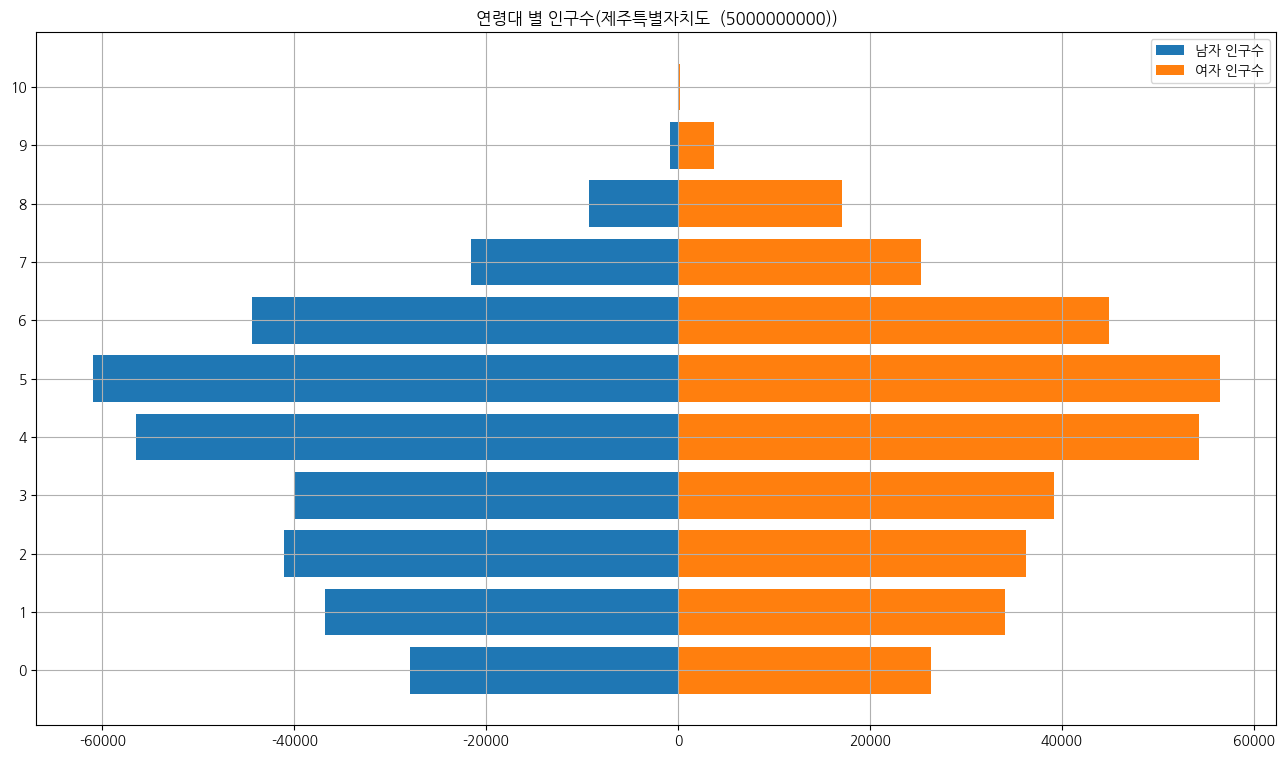

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
addr = '제주특별자치도  (5000000000)'

for row in data:
  #if '부산광역시  (2600000000)' in row[0]:
  if addr in row[0]:

    for number in row[3:14]:
      man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(11), man_population, label='남자 인구수')
plt.barh(range(11), woman_population, label='여자 인구수')

# --- 이전 코드에 추가한 부분
y_tick = list(range(0, 11))
plt.yticks(y_tick)
# ---------------------------

plt.title('연령대 별 인구수({})'.format(addr))
plt.legend()
plt.grid()
plt.show()

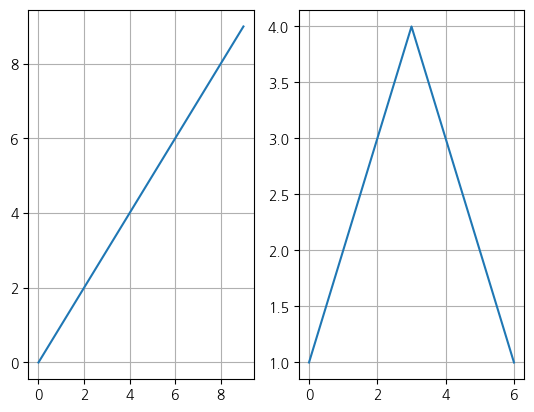

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(range(10), range(10))
plt.grid()

plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4, 3, 2, 1])
plt.grid()
plt.show()

부산광역시 전체와 서울특별시 전체의 인구 분포를 비교해 보겠습니다.

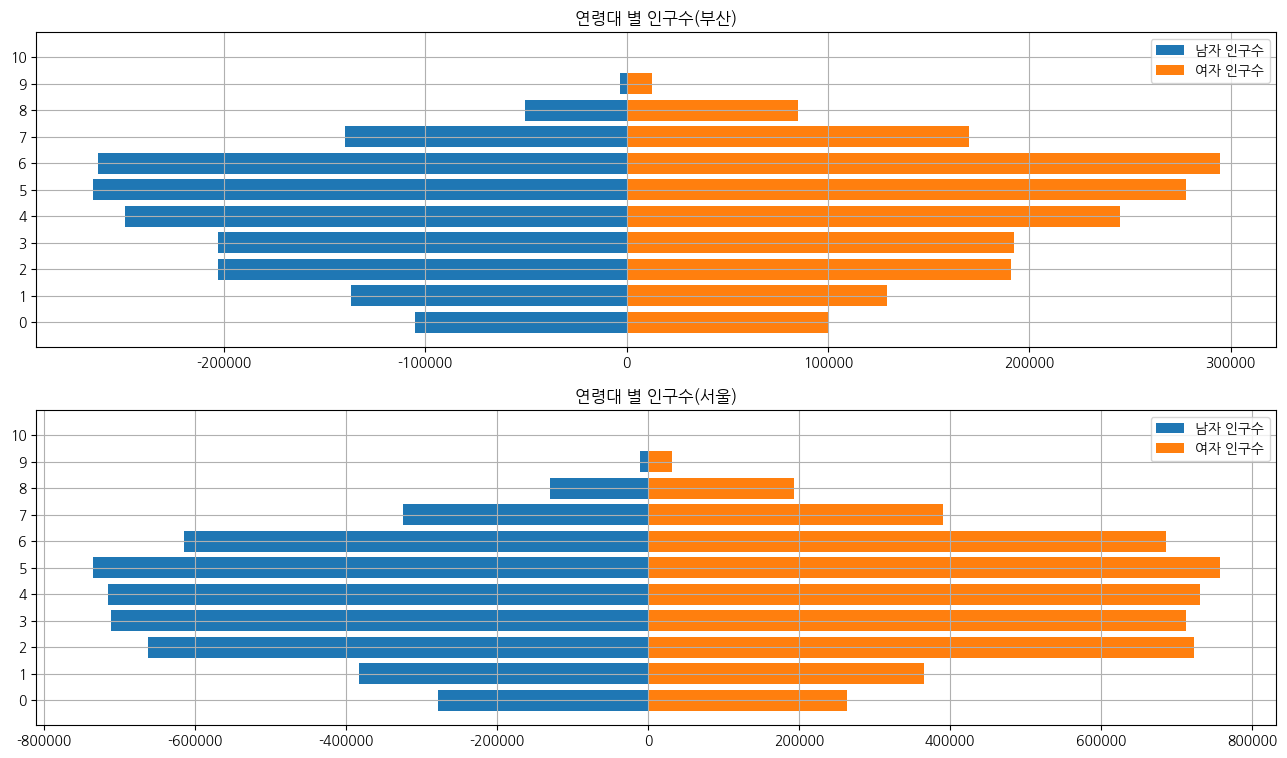

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

busan_man_population =[]
busan_woman_population =[]
seoul_man_population =[]
seoul_woman_population=[]

for row in data:
  if '부산광역시  (2600000000)' in row[0]:
    for number in row[3:14]:
      busan_man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      busan_woman_population.append( int(number.replace(',','')) )

  if '서울특별시  (1100000000)' in row[0]:
    for number in row[3:14]:
      seoul_man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      seoul_woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))

plt.subplot(2,1,1)
plt.barh(range(11), busan_man_population, label='남자 인구수')
plt.barh(range(11), busan_woman_population, label='여자 인구수')
y_tick = list(range(0, 11))
plt.yticks(y_tick)
plt.title('연령대 별 인구수(부산)')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.barh(range(11), seoul_man_population, label='남자 인구수')
plt.barh(range(11), seoul_woman_population, label='여자 인구수')
y_tick = list(range(0, 11))
plt.yticks(y_tick)
plt.title('연령대 별 인구수(서울)')
plt.legend()
plt.grid()
plt.show()

**위 두 그래프를 비교할 때 주의할 사항이 있습니다. x 축은 인구 수를 나타내는데 부산 인구수 그래프의 x축 범위와 서울 인구수 그래프의 x축 범위가 다릅니다.** 두 지역의 연령대별 인구 수 비율만 살펴보겠습니다.

서울의 연령대별 인구 분포를 보면 남여 고르게 20, 30, 40, 50대 고르게 거주하고 있는 반면 부산은 20대, 30대 비율이 40, 50대에 비해 적은 것을 알 수 있습니다.


위 그래프를 조금 수정해 보겠습니다.
- 서울에 대한 연령대 별 인구수 그래프를 위에 배치하고
- 부산과 서울의 연령대 별 인구수 그래프의 x축 범위를 동일하게 표현하겠습니다.

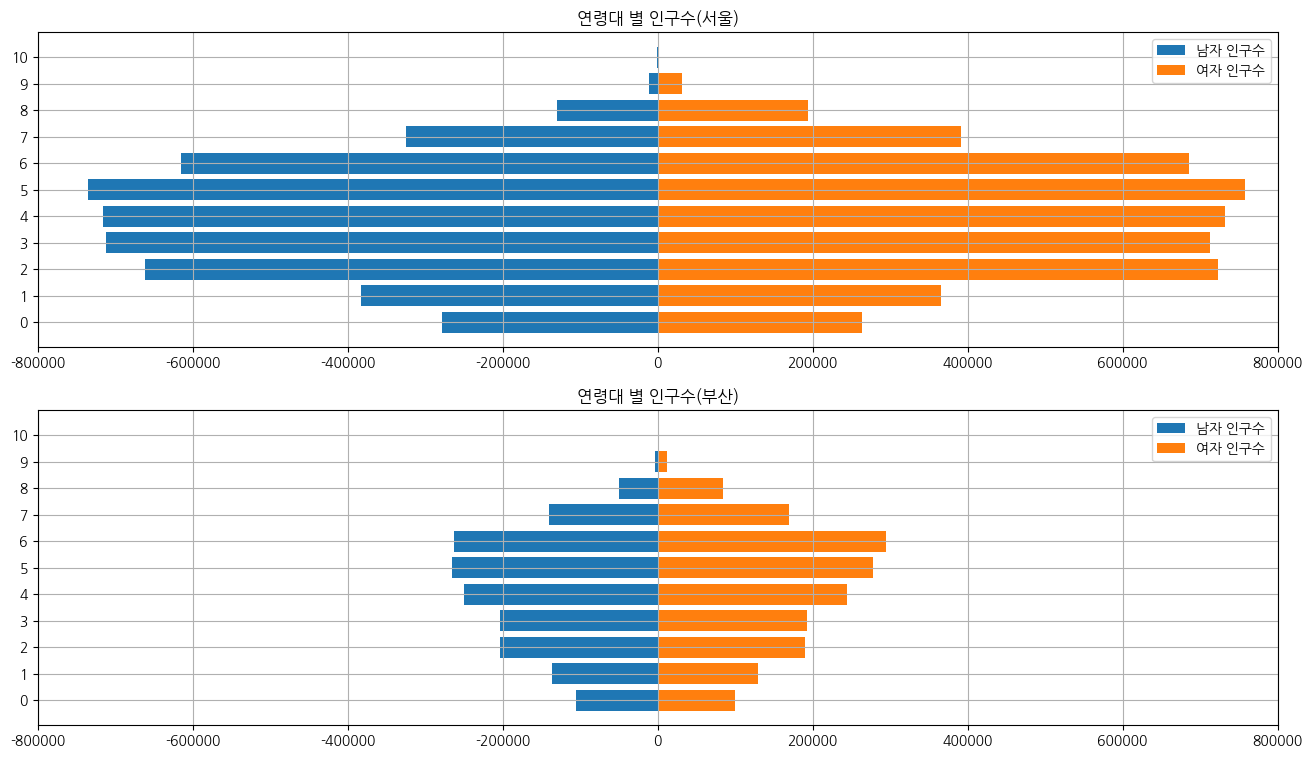

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202307.csv', encoding='cp949')
data = csv.reader(f)
next(data)

busan_man_population =[]
busan_woman_population =[]
seoul_man_population =[]
seoul_woman_population=[]

for row in data:
  if '부산광역시  (2600000000)' in row[0]:
    for number in row[3:14]:
      busan_man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      busan_woman_population.append( int(number.replace(',','')) )
  if '서울특별시  (1100000000)' in row[0]:
    for number in row[3:14]:
      seoul_man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      seoul_woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))

plt.subplot(2,1,1)
plt.barh(range(11), seoul_man_population, label='남자 인구수')
plt.barh(range(11), seoul_woman_population, label='여자 인구수')
y_tick = list(range(0, 11))
plt.yticks(y_tick)

#############   추가된 코드
plt.xlim([-800000, 800000])
####################################
plt.title('연령대 별 인구수(서울)')
plt.legend()
plt.grid()




plt.subplot(2,1,2)
plt.barh(range(11), busan_man_population, label='남자 인구수')
plt.barh(range(11), busan_woman_population, label='여자 인구수')
y_tick = list(range(0, 11))
plt.yticks(y_tick)

################## 추가된 코드
plt.xlim([-800000, 800000])
######################################
plt.title('연령대 별 인구수(부산)')
plt.legend()
plt.grid()


plt.show()

##UNIT 09 우리 동네 인구 구조를 파이 차트로 나타내기

앞서 인구 데이터를 꺽은선 그래프와 막대 그래프, 수평 막대 그래프로 시각화했습니다. 아래와 같은 그래프를 보고 **"남성과 여성의 성별 비율을 쉽게 알아 볼 구 있습니까?** 좀 더 쉽게 남성과 여성의 비율을 파악할 수 있는 시각화 방법을 알아볼 필요가 있습니다.

<center>

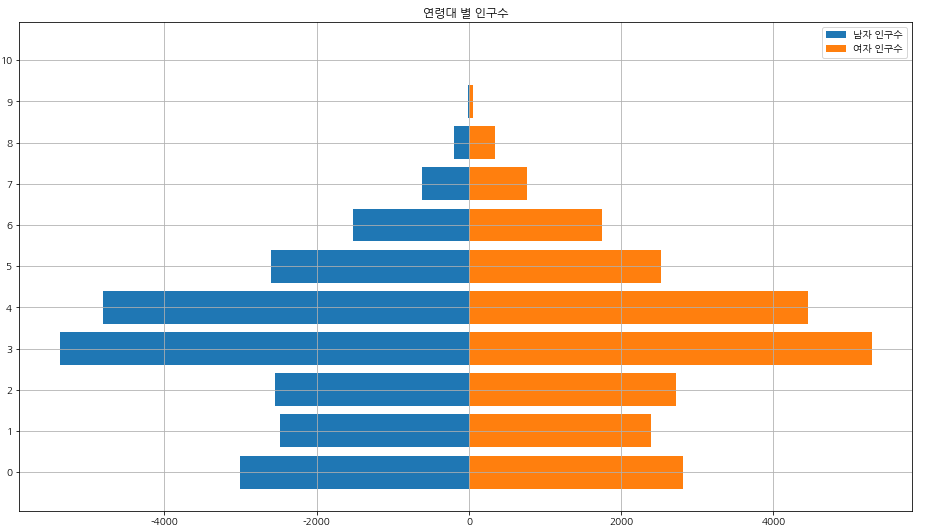
</center>



###1.제주도에는 여성의 비율이 더 높을까
제주도에는 여성, 돌, 바람이 많다고 삼다도(三多島)라고 불렀다는 말이 있습니다. 들어 보셨지요? 그렇다면 정말로 제주도는 남자 보다 여자의 수가 더 많을까요? 일단 수평 막대 그래프로 제주도의 남여 인구 분포 그래프를 그려보겠습니다.

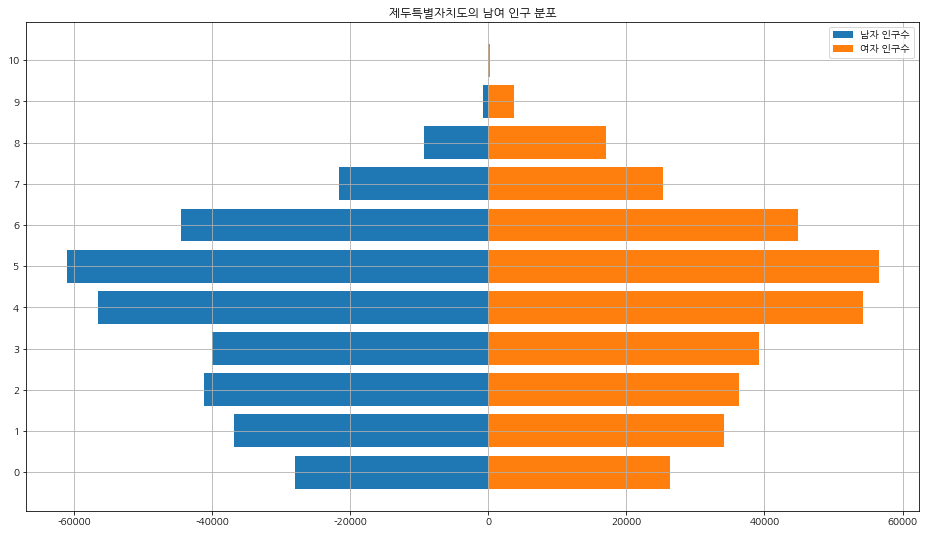

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '제주특별자치도  (5000000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( -1*int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )

f.close()

plt.figure(figsize=(16,9))
plt.barh(range(11), man_population, label='남자 인구수')
plt.barh(range(11), woman_population, label='여자 인구수')

y_tick = list(range(0, 11))
plt.yticks(y_tick)

plt.title('제주특별자치도의 남여 인구 분포')
plt.legend()
plt.grid()
plt.show()

우리가 원하는 것은 '제주도에 남여 성별 분포'가 어떠한가를 알고 싶은 것이었습니다. 또는 성별 분포를 시각적으로 잘 표현한 방법을 찾는 것이었습니다. 일단 이쯤에서 다른 이야기를 좀 한 후에 다시 이 문제로 되돌아 오겠습니다.


###2. 혈액형 비율 표현하기


####pie() 함수
'원 그래프'라고도 불리는 **파이 차트(pie chart)**로 표현하는 방법을 살펴 보겠습니다.

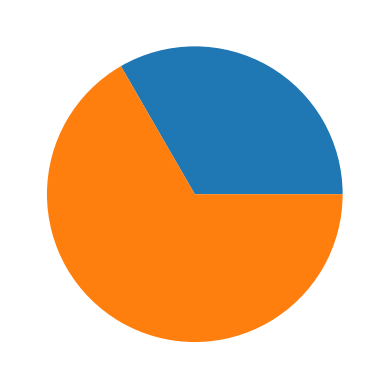

In [ ]:
import matplotlib.pyplot as plt
plt.pie([10,20])
#plt.axis('equal')
plt.show()

파이 차트로 표현하려는 리스트형 데이터는 10과 20을 요소로 가지고 있습니다. 첫 번째 요소는 전체 30에서 10이고 두 번째 요소는 전체 30에서 20이네요. 각각 요소는 전체의 1/3과 2/3에 해당합니다.

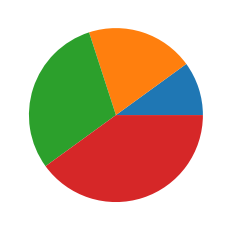

In [ ]:
import matplotlib.pyplot as plt
plt.pie([10, 20, 30, 40])
#plt.axis('equal')
plt.show()

파이 차트로 표현하려고 하는 데이터는 리스트 형 데이터로 각 요소는 10, 20, 30, 40입니다. 각 요소의 합은 100이구요. 첫 번째 요소 10은 전체 100에서 10%, 두 번째 요소 20은 전체 100에서 20%, ..., 마지막 요소의 값은 40이고 전체 100에서 40%에 해당합니다. 파이 차트가 데이터를 어떻게 시각화 하는지 감을 잡으셨을 것으로 예상됩니다.

아래 코드를 실행했을 때 어떤 결과가 예상됩니까?

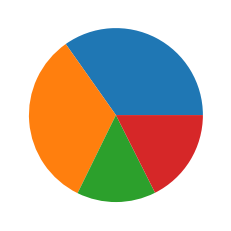

In [ ]:
import matplotlib.pyplot as plt
size = [2441, 2312, 1031, 1233]
plt.pie(size)
#plt.axis('equal')
plt.show()

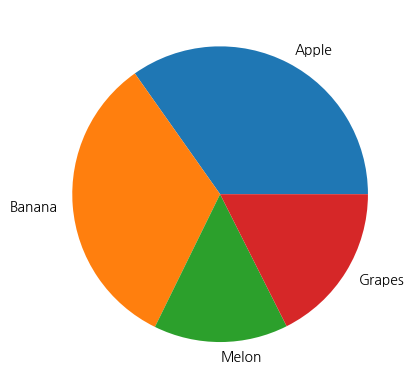

In [ ]:
import matplotlib.pyplot as plt
size = [2441, 2312, 1031, 1233]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
plt.pie(size, labels=labels)
plt.show()

#### 레이블(label) 추가하기

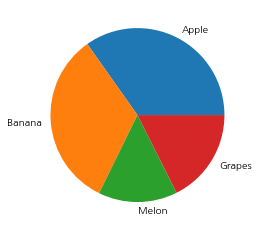

In [ ]:
import matplotlib.pyplot as plt
size = [2441, 2312, 1031, 1233]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
plt.pie(size, labels=labels)
plt.show()

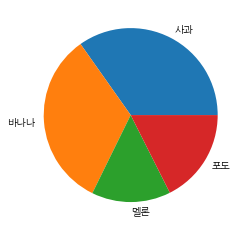

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
plt.pie(size, labels=labels)
plt.show()

####파이 차트의 시작 각도 지정
기본 각도는 0도이며 x-축과 일치한다. 첫 번째 요소에 대한 '파이 조각'이 x-축에서 부터 시작한다. 위 이미지에서 첫 번째 요소인 '사과'는 x-축 방향에서 시작했습니다. 아래 코드(```startange=90```)에 의한 파이 차트는 x-축을 기준으로 90도 이동하여 사과에 대한 '파이 조각'이 시작되었습니다.

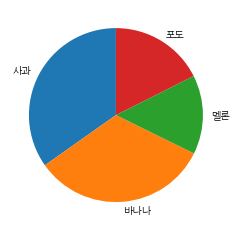

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
plt.pie(size, labels=labels, startangle=90)
plt.show()

#### 비율 및 범례 표시하기


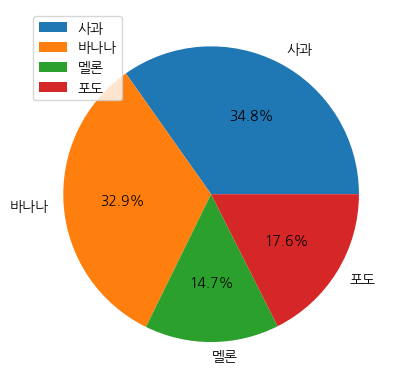

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
plt.pie(size, labels=labels, autopct='%.1f%%')
plt.legend()
plt.show()

```autopct``` 속성은 auto percent를 의미합니다. ```%.1f%%```는 소수점 아래 첫 번째 자리까지 표현하라는 의미입니다.

###색 및 돌출 효과 지정하기
차트의 색을 지정하는 방법과 강조하고 싶은 '파이 조각'을 돌출시키는 방법을 알아보겠습니다. 먼저 각 파이 조각의 색을 지정하는 방법을 살펴 보겠습니다.

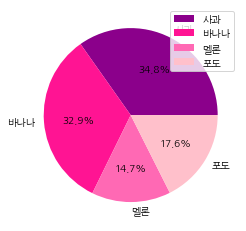

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
colors = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.pie(size, labels=labels, autopct='%.1f%%', colors = colors)
plt.legend()
plt.show()

다양한 색 이름은 [여기](https://matplotlib.org/stable/gallery/color/named_colors.html)에서 확인하실 수 있습니다. 이번에는 강조 하고 싶은 '파이 조각'을 돌출시키는 방법을 알아 보겠습니다. '멜론'에 해당하는 '파이 조각'을 돌출 시켜보겠습니다.

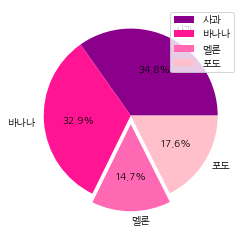

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
colors = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.pie(size, labels=labels, autopct='%.1f%%', colors = colors, explode=(0, 0, 0.1, 0))
plt.legend()
plt.show()

###참고 - 부채꼴 스타일로 지정하기


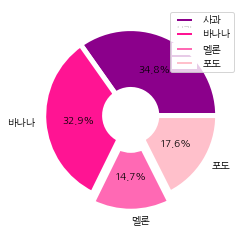

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
colors = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5}
plt.pie(size, labels=labels, autopct='%.1f%%', colors = colors, explode=(0, 0, 0.1, 0), wedgeprops=wedgeprops)
plt.legend()
plt.show()

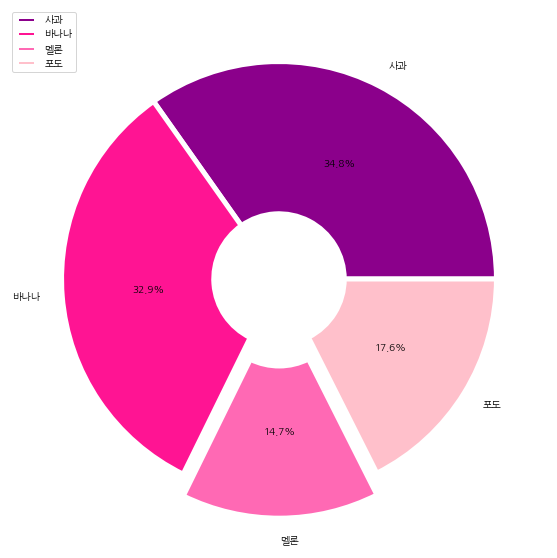

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

size = [2441, 2312, 1031, 1233]
labels = ['사과', '바나나', '멜론', '포도']
colors = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth':5 }

plt.figure(figsize=(10, 10))
plt.pie(size, labels=labels, autopct='%.1f%%', colors = colors, explode=(0, 0, 0.1, 0), wedgeprops=wedgeprops)
plt.legend()
plt.show()

###3. 제주도 남여 인구 비율 표현하기
제주도 인구의 남여 성별 비율을 파이 차트로 표현해보겠습니다. 수평 막대 그래프로 표현하는 것 보다 효과적일 것으로 예상됩니다.

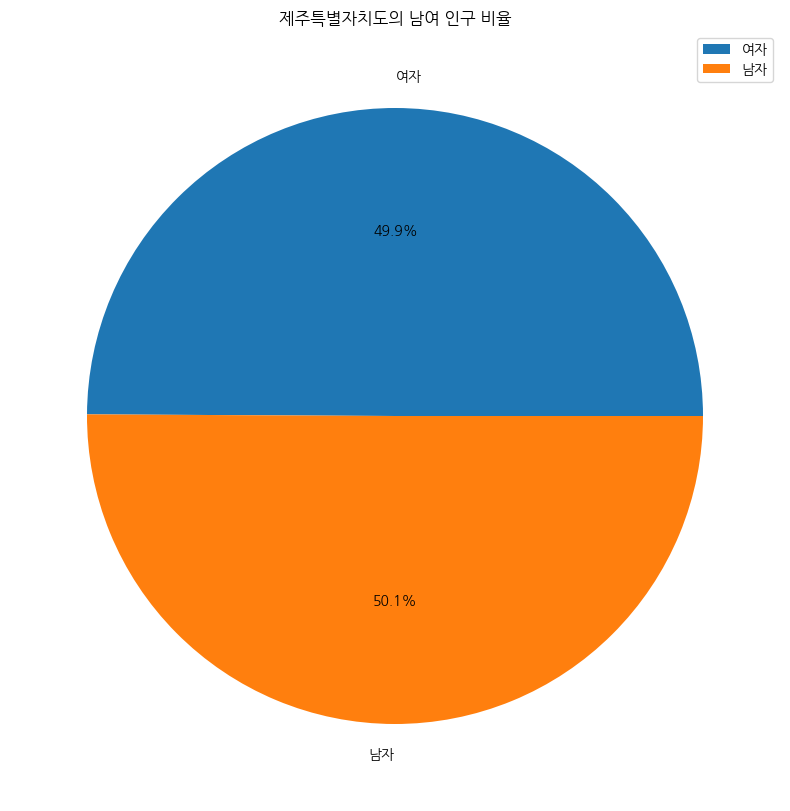

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population = 0
woman_population =0

for row in data:
  if '제주특별자치도  (5000000000)' in row[0]:
    for number in row[3:14]:
      man_population += int(number.replace(',',''))
    for number in row[16:]:
      woman_population += int(number.replace(',',''))
    break

f.close()

plt.figure(figsize=(10,10))
plt.title('제주특별자치도의 남여 인구 비율')
plt.pie([woman_population, man_population], labels=['여자', '남자'], autopct='%.1f%%')
plt.legend()
plt.grid()
plt.show()

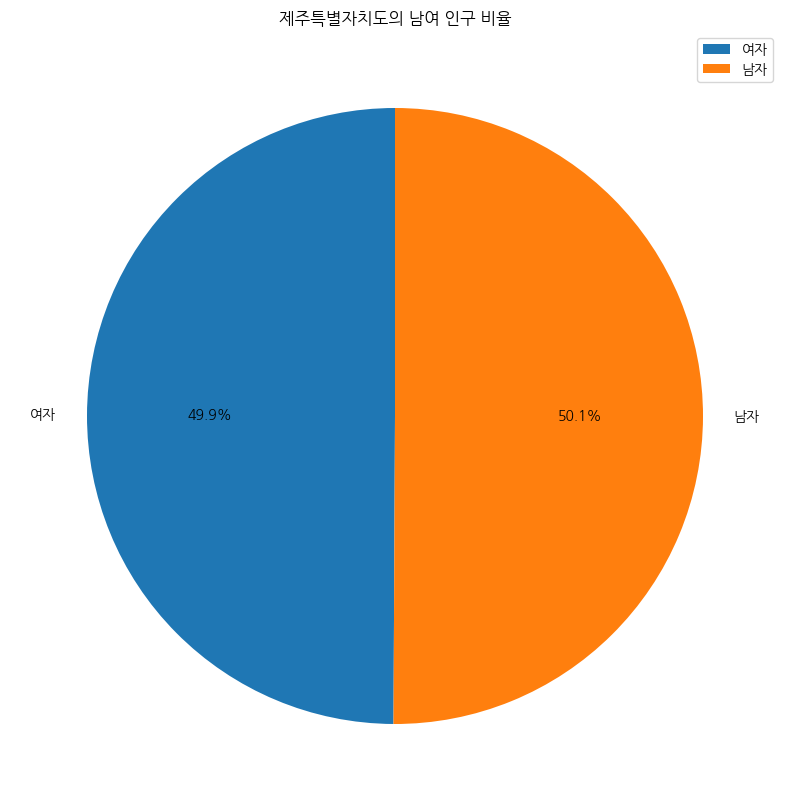

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population = 0
woman_population =0

for row in data:
  if '제주특별자치도  (5000000000)' in row[0]:
    for number in row[3:14]:
      man_population += int(number.replace(',',''))
    for number in row[16:]:
      woman_population += int(number.replace(',',''))
    break

f.close()

plt.figure(figsize=(10,10))
plt.title('제주특별자치도의 남여 인구 비율')
plt.pie([woman_population, man_population], labels=['여자', '남자'], autopct='%.1f%%', startangle=90)
plt.legend()
plt.grid()
plt.show()

위 파이 차트에서 글자 크기(font size)가 마음에 안드네요. '와이리 작노~'
```plt.pie()```함수에 다음과 같은 설정 값을 전달합니다.
```
textprops={'size':N}
```
여기서 `N`은 크기를 나타내는 숫자입니다.

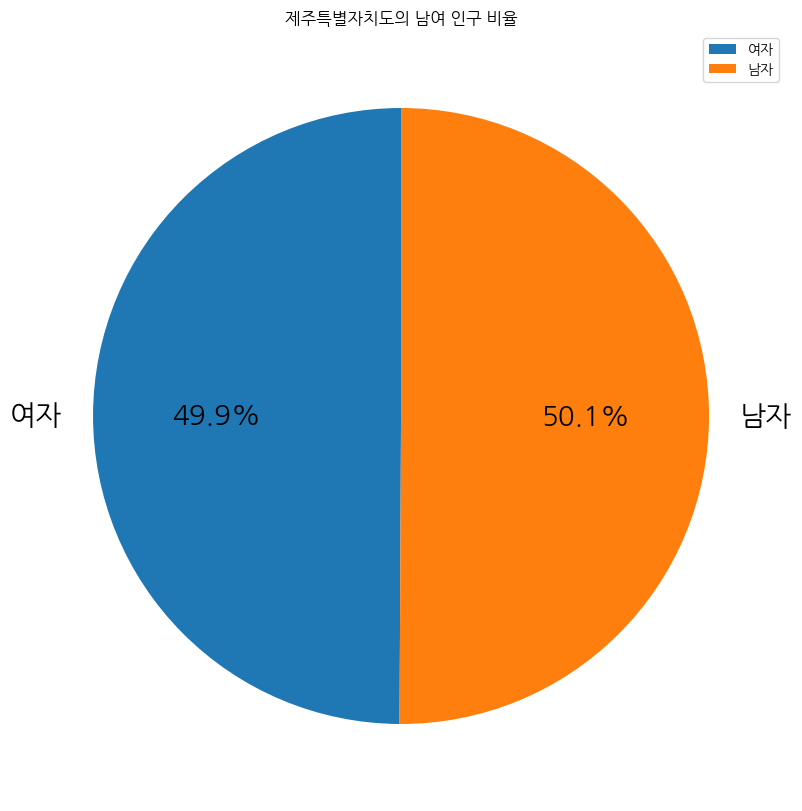

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population = 0
woman_population =0

for row in data:
  if '제주특별자치도  (5000000000)' in row[0]:
    for number in row[3:14]:
      man_population += int(number.replace(',',''))
    for number in row[16:]:
      woman_population += int(number.replace(',',''))

f.close()

plt.figure(figsize=(10,10))
plt.title('제주특별자치도의 남여 인구 비율')
plt.pie([woman_population, man_population], labels=['여자', '남자'], autopct='%.1f%%', startangle=90, textprops={'size':20})
plt.legend()
plt.grid()
plt.show()

자~ 잠깐! 지금 우리가 무엇을 하고 있습니까? '제주도에는 남자 보다 여자가 더 많을가?'라는 의문을 가지고 여기까지 왔습니다. 통계 자료를 기반으로 위와 같이 그래프로 그려보니 시각적으로 명확하게 알 수 있었습니다. '제주도에 사는 남자와 여자의 인구 비율이 거의 5:5네~!'

#UNIT 10 우리 동네 인구 구조를 산점도로 나타내기
제주도의 인구 분포를 알아 보기 위해, 연령대별 인구 분포와 성별 비율을 나타내는 그래프를 다시 살펴 보겠습니다.
<center>  

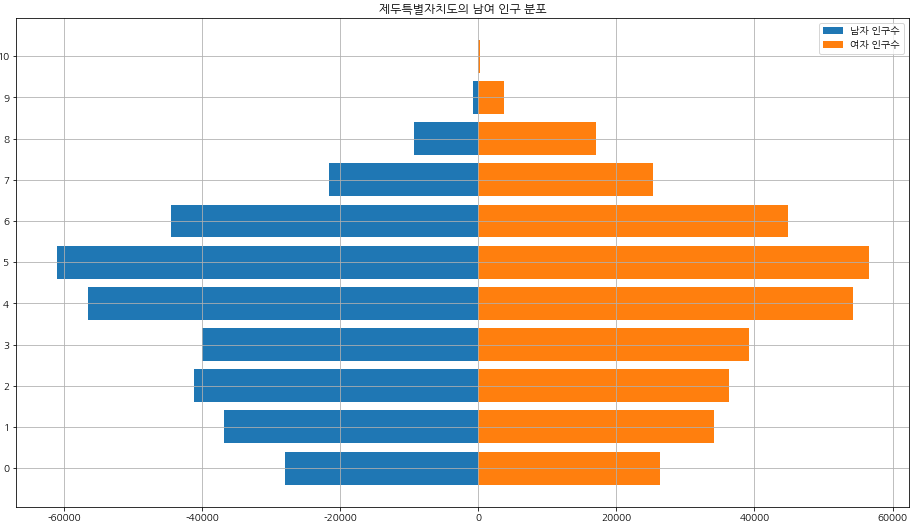

</center>

<center>

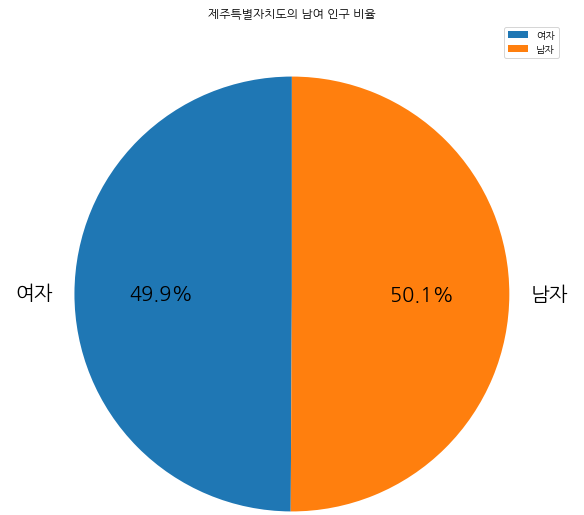
</center>

수평 막대 그래프
- 70대 이상(노인)의 경우 여성이 남성 보다 많음.
- 10대와 20대는 남성이 여성 보다 많음

정도를 알 수 있고

파이 차트를 보면
- 나이와 상관없이 남여의 비율만 보자면 거의 5:5  

인 것을 알 수 있습니다.

<font color=blue>**연령대별 성별 비율을 지금보다 더 알아보기 쉽게 표현할 수 있을까요?**</font>



##1. 꺽은선 그래프로 표현하기


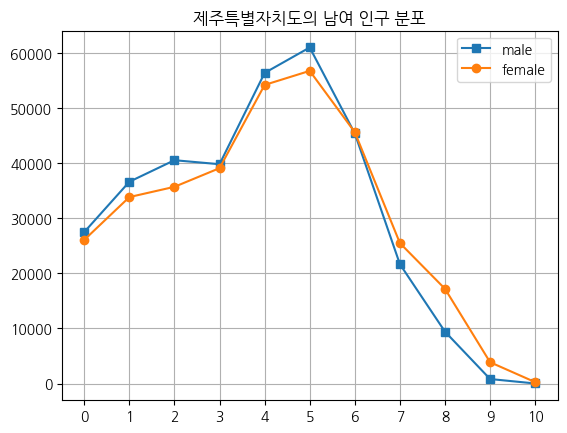

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '제주특별자치도  (5000000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('제주특별자치도의 남여 인구 분포')
plt.legend()
plt.grid()
plt.show()

**데이터를 어떻게 시각화 하느냐에 따라 데이터가 가지고 있는 정보를 쉽게 발견할 수 있습니다!**

#####Quiz
여러분이 사시는 동네의 남여 인구수를 연령대 별로 위와 같은 그래프를 그리는 코드를 작성하세요.


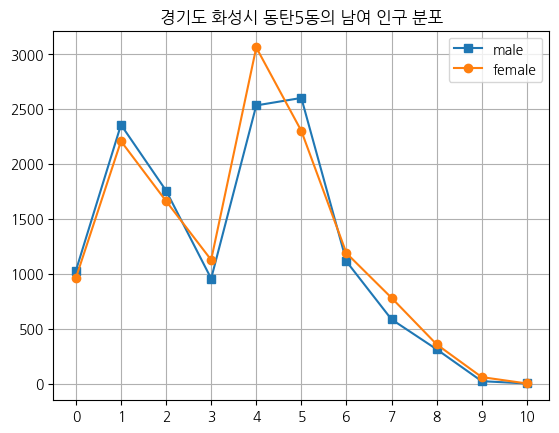

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '동백2동' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('경기도 화성시 동탄5동의 남여 인구 분포')
plt.legend()
plt.grid()
plt.show()

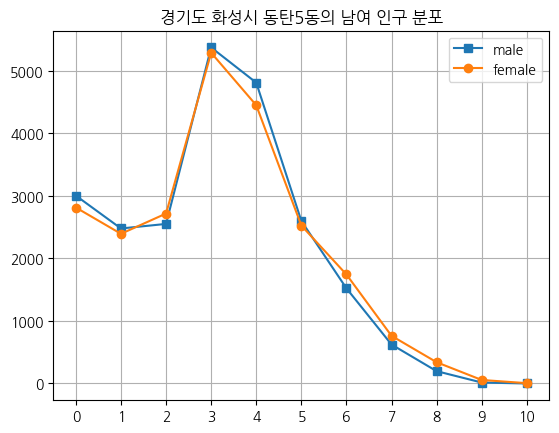

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202307.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '동탄5동' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('경기도 화성시 동탄5동의 남여 인구 분포')
plt.legend()
plt.grid()
plt.show()

지극히 주관적인 생각입니다만, 동탄5동의 인구 분포에는 눈에 띠는 연령대가 있네요. 대체적으로 거의 모든 지역에서 60대 이상의 경우 남성 보다 여성의 비율이 조금 높을 것으로 예상 했습니다. 그런데 40대의 경우 남성의 숫자가 더 많네요. 왜 그럴까요? 동탄5동에는 주택지역+상업지역+회사지역 형태라서? 이 점에 대해서는 그만 고민하고 다음 내용으로 넘어가겠습니다.

여러 분이 사시는 동네는 어떤가요? 울산시 전체의 연령대 별 성별 분포를 확인해 보고 싶어졌습니다.


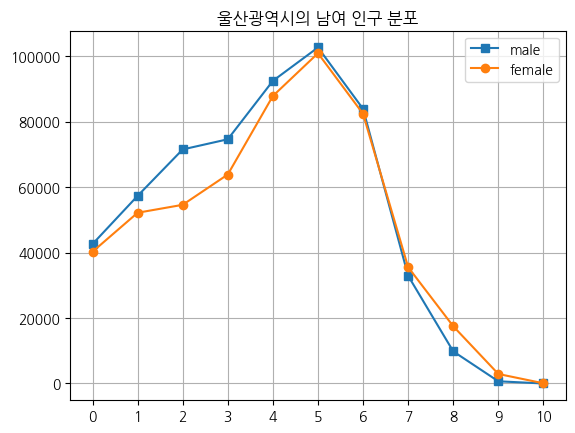

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '울산광역시  (3100000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break
f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('울산광역시의 남여 인구 분포')
plt.legend()
plt.grid()
plt.show()

웃자고(?) 하는 소리입니다. "울산 큰 일 났습니다. 20대, 30대의 경우 남성 대비 여성의 수가 적습니다!" 60대 때는 남여 비율이 대략 5:5이나 그 이상의 열령대에서는 남자 어르신의 숫자가 적네요.

부산도 조사를 안해볼 수가 없네요.


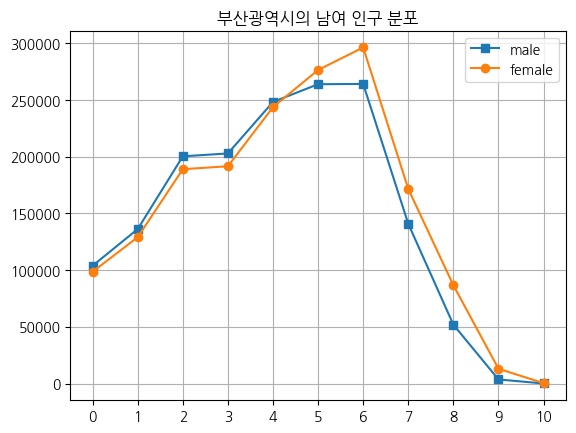

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '부산광역시  (2600000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('부산광역시의 남여 인구 분포')
plt.legend()
plt.grid()
plt.show()

부산에 사는 친구, 부산에 사시는 형님 그리고 남자 어르신들께서는 동년 배의 여성 보다 숫자가 적네요.
20대와 30대의 남여 성비는 울산광역시와 조금 다른 양상이군요.

**여기서 잠깐!** 0세부터 9세의 인구가 해당 지역을 떠나지 않았다면 10년 후 10세\~19세에 해당할 것입니다. 음....!?! 아무튼 40\~50대 인구수 보다 20\~30대 인구수가 적네요. 20\~30대 인구수에 비해 0~9세의 인구수는 더 적네요.

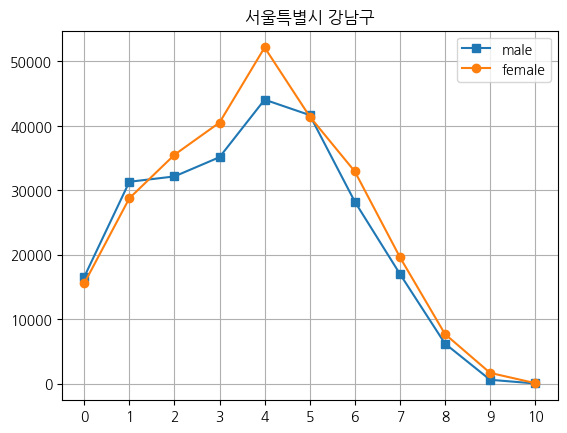

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '서울특별시 강남구 (1168000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('서울특별시 강남구')
plt.legend()
plt.grid()
plt.show()

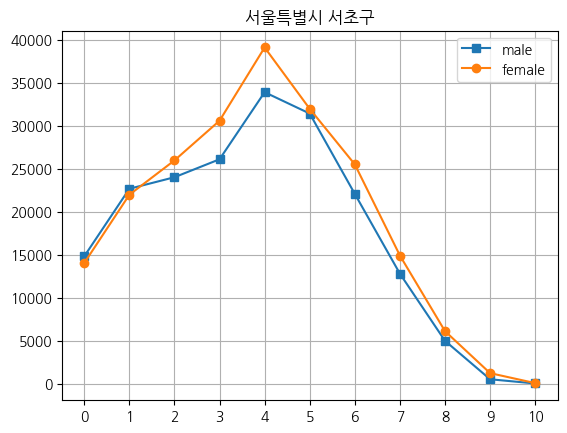

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender_202306.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]

for row in data:
  if '서울특별시 서초구 (1165000000)' in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

#plt.figure(figsize=(6,4))
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('서울특별시 서초구')
plt.legend()
plt.grid()
plt.show()

###<font color=red>Quiz</font>
위 코드셀의 코드를 수정하여 '지역 이름'을 입력하면 위과 같은 성격의 그래프를 그리는 코드를 작성하시오. 그림의 제목(title)로 자동으로 해당 지역 이름으로 변경되어야겠습니다.

In [ ]:
!pip install koreanize-matplotlib

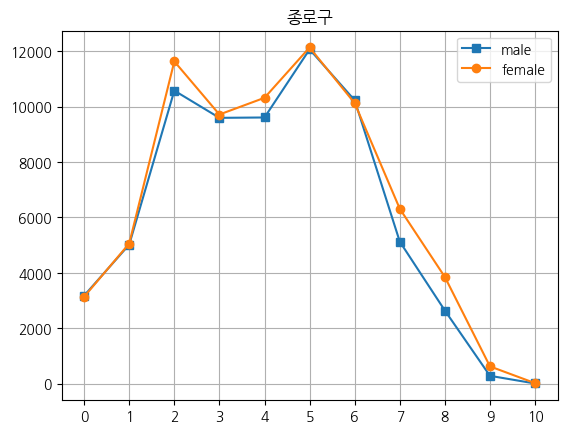

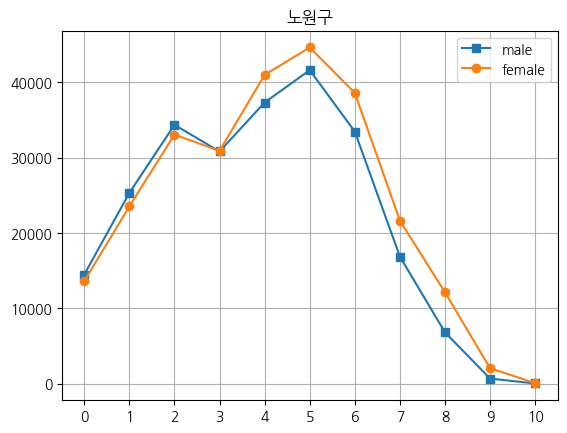

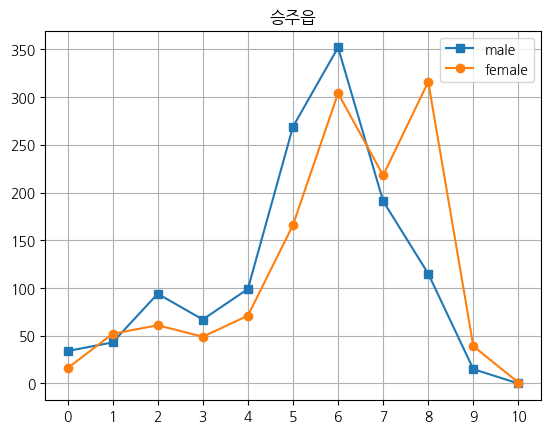

In [ ]:
import csv
import matplotlib.pyplot as plt
import koreanize_matplotlib

f = open('gender_202306.csv', encoding='cp949')        # 파일 오픈
data = csv.reader(f)                            # 파일로부터 데이터 읽어 옴
next(data)                                      # 읽어온 데이터에서 header 부분 삭제
data_bank = list(data)                          # 데이터를 리스트 형으로 변환
f.close()                                       # 파일 클로즈

while True:
  name = input('검색을 원하는 지역 이름을 입력해주세요(종료를 원하시면 ENTER): ')
  plt.close()
  if name == 'q':
    break

  man_population =[]
  woman_population =[]

  for row in data_bank:
    if name in row[0]:
      for number in row[3:14]:
        man_population.append( int(number.replace(',','')) )
      for number in row[16:]:
        woman_population.append( int(number.replace(',','')) )
      break

  plt.plot(range(11), man_population, 's-', label='male')
  plt.plot(range(11), woman_population,'o-', label='female')
  x_tick = list(range(0, 11))
  plt.xticks(x_tick)
  plt.title(name)
  plt.legend()
  plt.grid()
  plt.show()

###3. 산점도로 표현하기
산점도
- 데이터 간의 관계를 파악하는데 도움이 됨
- 가로축과 세로축을 기준으로 두 요소가 서로 어떤 관계를 맺고 있은지 파악할 수 있음


산점도로 표현된 그래프를 해석하기 위해 돔(도미)을 가지고 이야기를 해보겠습니다.
여러 마리의 돔이 있습니다. 각각의 길이와 무게를 측정하여 아래 코드와 같은 데이터를 얻었습니다.

예상하건데, 돔의 무게는 길이에 비례할 것 같습니다. 돔의 두께 정보는 아직 마련하지 못했지만, 이른바 '빵'이 크면 무게가 많이 나갈 것으로 예상됩니다. 아래 데이터는 실측한 데이터라고 믿으시고 ^^ 이 두 데이터(길이와 무게)의 관계를 살펴 보기 위해 산점도를 그려 보겠습니다.

x-y 좌표로 이루어진 그래프 그러니까 x축은 길이, y 축은 무게로 정하고 어떤 도미의 (길이, 무게) 좌표를 그래프에 점으로 찍는 것입니다. **아래 코드는 신경 쓰지 마시고 그래프만 살펴 보시기 바랍니다.**


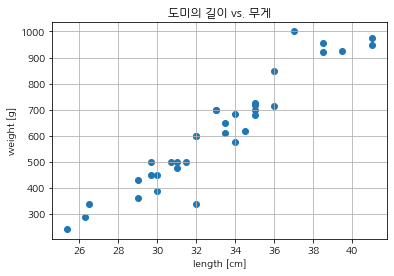

In [ ]:
# 도미의 특성(feature)으로 길이와 무게를 고려함
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 길이(length)의 단위는 [cm]
# 무게(weight)의 단위는 [g] (그람)

import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.scatter(bream_length, bream_weight)     # 첫 번째 인자는 수평 축(길이), 두 번째 인자는 수직 축(무게)
plt.xlabel('length [cm]')                   # x 축은 도미의 길이
plt.ylabel('weight [g]')                    # y 축은 도미의 무게
plt.title('도미의 길이 vs. 무게')
plt.grid()
plt.show()

**여기서 교재 그림 10-5와 그림 10-6의 그림을 보여주고 설명할 것**

###4.scatter() 함수로 표현하기
산점도는 ```scatter()```함수를 사용하여 표현할 수 있습니다. 'scatter'라는 뜻은 '흩뿌리다, 사방으로 흩어지다' 등의 의미입니다.


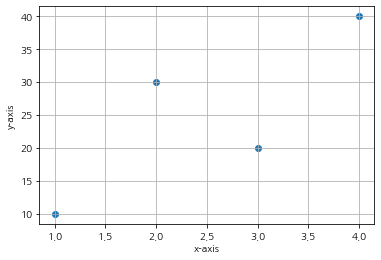

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 30, 20, 40]

plt.scatter(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.show()

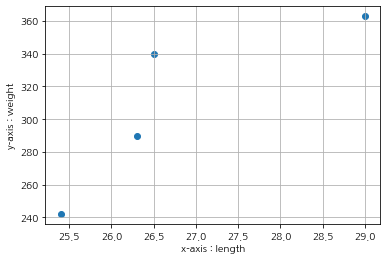

In [ ]:
import matplotlib.pyplot as plt
length = [25.4, 26.3, 26.5, 29.0]
weight = [242.0, 290.0, 340.0, 363.0]

plt.scatter(length, weight)
plt.xlabel('x-axis : length')
plt.ylabel('y-axis : weight')
plt.grid()
plt.show()

####5. 버블 차트로 표현하기
버블 차트는 3가지의 특성을 동시에 표현할 수 있는 그래프입니다. ```scatter()``` 함수로 버블 차트를 그릴 수 있습니다. 위 예에서는 두 특성, 길이와 무게에 대한 관계를 파악하기 위해 ```scatter()```함수에 두 가지 특성(길이, 무게)을 전달했었습니다.

3가지 특성 사이의 관계를 버블 차트로 그리기 위해 ```scatter()``` 함수에 추가적인 특성 정보인 ```s``` 속성을 지정해 줘야합니다. ```s```는 마커의 크기를 결정합니다. 세 가지 특성은 x-축, y-축 그리고 마커의 크기로 표현됩니다. 앞서 말씀드린 것과 같이 버블 차트는 세 가지 특성을 2차원 평면에 표현됩니다.


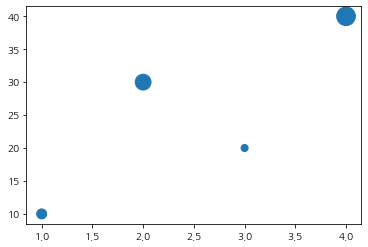

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s = [100, 250, 50, 350])
plt.show()

첫 번째 데이터(점)은 `(x[0], y[0], s[0])`의 데이터를 표현한 것이고 두 번째 데이터(점)은 `(x[1], y[1], s[1])`의 데이터를 표현한 것이고 세 번째 데이터(점)은 `(x[2], y[2], s[2])`이며 네 번째 마지막 데이터(점)은 `(x[3], y[3], s[3])`의 데이터를 표현한 것입니다.

```scatter()```함수에 ```c``` 속성을 지정하면 마커의 색깔도 지정할 수 있습니다.

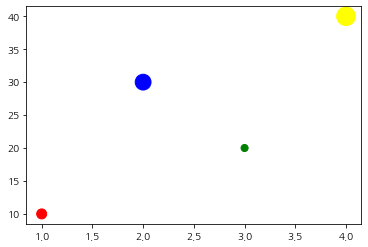

In [ ]:
import matplotlib.pyplot as plt
color = ['red', 'blue', 'green', 'yellow']
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s = [100, 250, 50, 350], c=color)
plt.show()

```scatter()```함수에서 ```c``` 속성을 추가하는데, 위와는 조금 다른 방법도 있습니다. 표현하려는 데이터(점) 4개를 각기 다른 색으로 표현하기 위해 c = range(4)를 사용할 수 있습니다.

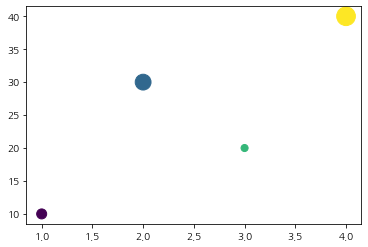

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 30, 20, 40]
s = [100, 250, 50, 350]
plt.scatter(x, y, s = s, c=range(4))
plt.show()

첫 번째 데이터(점), `(x[0], y[0], s[0])`의 색은 ```c=range(4)```에 의해 내부적으로 약속된 4개의 색 중 0번 색이 할당되고 두 번째 데이터(점),  `(x[1], y[1], s[1])`의 색은 ```c=range(4)```에 의해 내부적으로 약속된 4개의 색 중 1번 색이 할당되는 방식으로 각 데이터(점)에 색이 지정됩니다. 순서대로 어떤 색이 할당되는지 확인하기 위해 위 코드에 ```plt.colorbar()```함수를 추가하겠습니다.

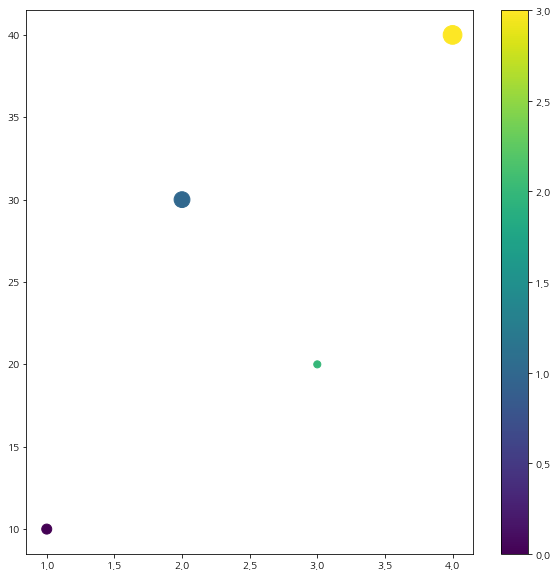

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 30, 20, 40]
s = [100, 250, 50, 350]
plt.figure(figsize=(10,10))
plt.scatter(x, y, s = s, c=range(4))
plt.colorbar()
plt.show()

위 그래프 왼쪽에 새롭게 나타난 '컬러 바'를 보면 0.0 즉 0위치의 색이 첫 번째 데이터, ```(x[0], y[0], s[0])```에 할당된 것을 확인할 수 있습니다. '컬러 바'의 1.0 즉 1 위치의 색이 두 번째 데이터, ```(x[1], y[1], s[1])```에 할당된 것을 보실 수 있습니다. 하나 더 해볼까요? '컬러 바'의 3.0 즉 3 위치의 색이 마지막 데이터, 인덱스 3으로 접근하는 ```(x[3], y[3], s[3])```의 색으로 할당된 것을 알 수 있습니다.

데이터 순서(인덱스)에 따른 (누군가가 만들어 놓은) 색깔 매핑(지정)이 마음에 안드는 분은 직접하시면 됩니다. 이미 우리는 그런 작업을 했었습니다.

```python
import matplotlib.pyplot as plt
color = ['red', 'blue', 'green', 'yellow']
plt.scatter([1, 2, 3, 4], [10, 30, 20, 40], s = [100, 250, 50, 350], c=color)
plt.show()
```

여러분께서 색매핑(color map) 매번 직접하시는 것 보다는 누군가가 만들어 놓은 색 매핑 방식을 골라서 쓰시는 것은 어떨까요? 누군가 여러 가지 색 매핑 방식을 만들어 놓았고 각 매핑 방식마다 이름을 붙여 두었습니다. 색 매핑 방식(이하 컬러 맵이라고 부르겠습니다) 중에 ```jet```라는 방식을 적용해서 위 버블 차트를 그려보겠습니다.

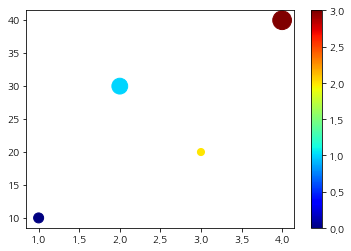

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 30, 20, 40]
size = [100, 250, 50, 350]
plt.scatter(x, y, s = size, c=range(4), cmap='jet')
plt.colorbar()
plt.show()

첫번째 데이터, 인덱스 0에 해당하는 데이터는 진한 파란색, 두 번째, 인덱스 1에 해당하는 데이터는 하늘색, 세 번째, 인덱스 2에 해당하는 데이터는 노란색, 마지막 데이터인 네 번째, 인덱스 3에는 빨간색이 할당되었네요.

이 컬러맵도 마음에 들지 않으시다면 아래 그림을 참고하여 다른 컬러 맵을 선택하세요.

<center>

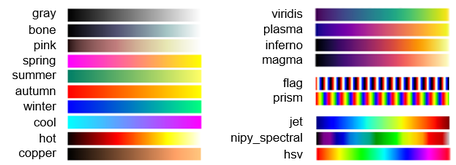
</center>

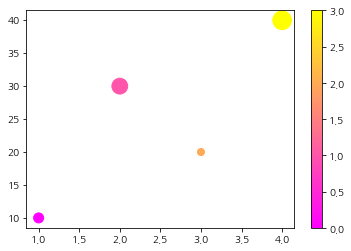

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 30, 20, 40]
size = [100, 250, 50, 350]
plt.scatter(x, y, s = size, c=range(4), cmap='spring')
plt.colorbar()
plt.show()

아래 코드는 데이터 개수가 4개가 아니라 5개입니다. 버블 차트의 왼쪽에 보인 '컬러 바'의 범위가 변했네요!!

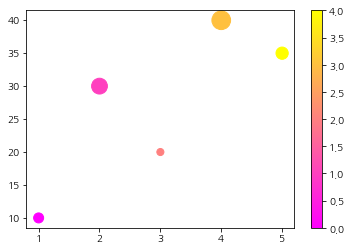

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [10, 30, 20, 40, 35]
size = [100, 250, 50, 350, 150]
plt.scatter(x, y, s = size, c=range(5), cmap='spring')
plt.colorbar()
plt.show()

```plt.scatter()```함수에서 ```c=range(5)```형식으로 ```c``` 속성을 지정을
했을 경우 각 데이터에 대한 색 지정은 컬러맵의 인덱스 순서로 지정되었습니다.


아래 코드의 실행 결과로 나타는 두 버블 차트를 비교해 보십시요.



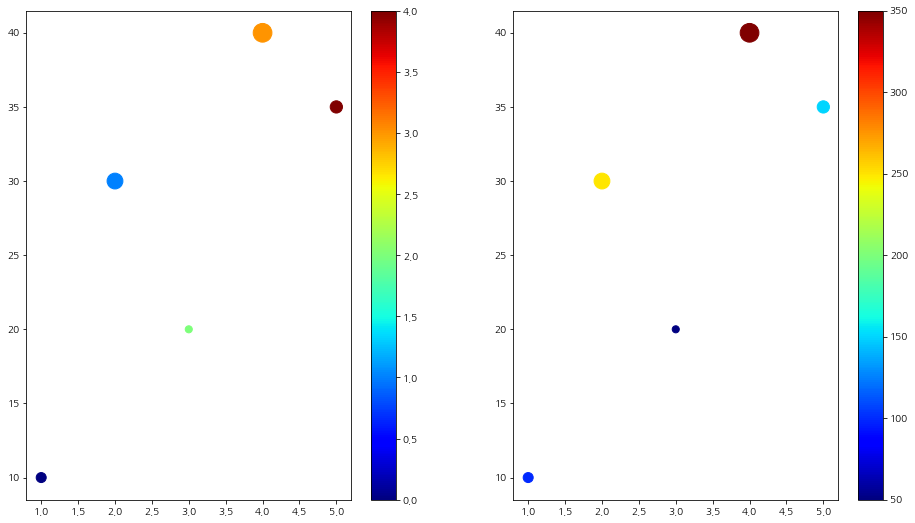

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [10, 30, 20, 40, 35]
size = [100, 250, 50, 350, 150]

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.scatter(x, y, s = size, c=range(5), cmap='jet')
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(x, y, s = size, c = size, cmap='jet')
plt.colorbar()

plt.show()

위 그림(figure)에서 왼쪽 그래프는 다음 코드에 의한 버블 차트입니다.
```python
plt.scatter(x, y, s = size, c=range(5), cmap='jet')
```
이때 나타난 '컬러 바'의 범위는 0 \~ 4입니다. → 데이터 개수, 데이터 인덱스
<br>  
<br>

위 그림(figure)에서 오른쪽 그래프는 다음 코드에의한 버블 차트입니다.
```python
plt.scatter(x, y, s = size, c=size, cmap='jet')
```
이 때 나타는 '컬러 바'의 범위는 0 \~ 350입니다. → 데이터(`c=size`)의 최소값 \~ 데이터(`c=size`)의 최대값




컬러맵 관련된 더 많은 정보는 [여기](https://matplotlib.org/stable/tutorials/colors/colormaps.html)를 참고하세요.

데이터(점)의 개수가 몇 개 안되니 버블 차트가 폼이 나지 않네요. 많은 데이터를 가지고 버블 차트를 그려 보겠습니다. 아래 코드는 중요하지 않으며 코드 실행 결과 얻은 버블 차트만 한번 보시기 바랍니다.

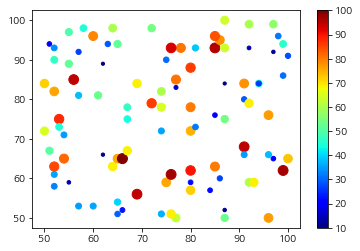

In [ ]:
import matplotlib.pyplot as plt
import random

x = []
y = []
size = []

for i in range(100):
  x.append( random.randint(50, 100) )
  y.append( random.randint(50, 100) )
  size.append( random.randint(10, 100) )

plt.scatter(x, y, s = size, c=size, cmap='jet')
plt.colorbar()
plt.show()

위 코드의 경우, 데이터(점)의 위치를 결정하는 것은 x 값과 y 값이며 마커의 크기는 size가 결정합니다. 마커의 색 또한 size가 결정합니다. 다시 말해서 size가 100이면 마커의 크기는 가장 크며 색은 빨간색으로 표현됩니다. 즉, size가 마커의 크기와 색을 결정하고 있습니다.  

---
힘 드시죠? 잠깐 쉬었다 가시죠~

그런데 말입니다. 위 버블 차트를 보고있자니 아쉬운 점이 보이네요. 작은 마커(점)가 큰 마커(점)에 가려지네요. 아래 코드 실행 결과 나타는 두 개의 버블 차트 중  어느 버블 차트가 더 마음에 드시나요?

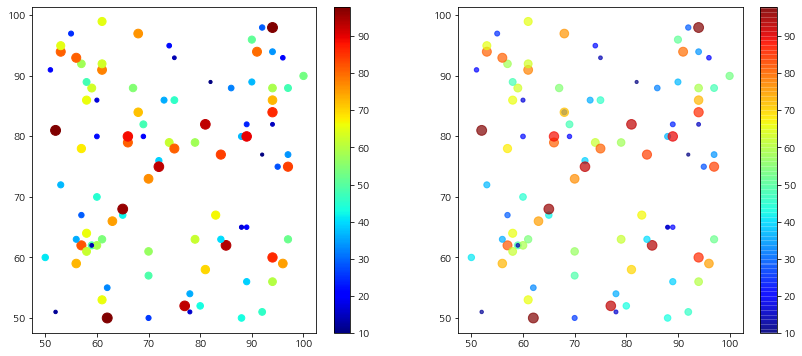

In [ ]:
import matplotlib.pyplot as plt
import random

x = []
y = []
size = []
random.seed(74)

for i in range(100):
  x.append( random.randint(50, 100) )
  y.append( random.randint(50, 100) )
  size.append( random.randint(10, 100) )

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(x, y, s = size, c=size, cmap='jet')
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(x, y, s = size, c=size, cmap='jet',alpha=0.7)
plt.colorbar()

plt.show()

```plt.scatter()```함수에 속성 ```alpha```를 지정하면 투명도를 설정할 수 있스니다. ```alpha```는 0부터 1까지의 값을 할당할 수 있는데, 0에 가까운 수일 수록 투명하고 1에 가까울 수록 불투명합니다.  

#####참고
아래 코드에서는 ```plt.grid()```함수만 눈으로 한번 보시고 넘어가겠습니다.

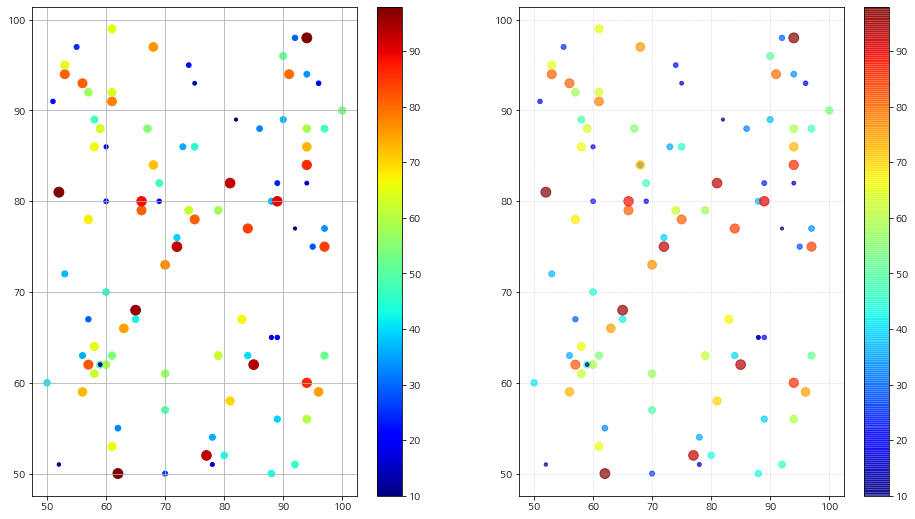

In [ ]:
import matplotlib.pyplot as plt
import random

x = []
y = []
size = []
random.seed(74)

for i in range(100):
  x.append( random.randint(50, 100) )
  y.append( random.randint(50, 100) )
  size.append( random.randint(10, 100) )

plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.scatter(x, y, s = size, c=size, cmap='jet')
plt.grid()
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(x, y, s = size, c=size, cmap='jet',alpha=0.7)
# plt.grid()
plt.grid(True, which='major', linestyle=':', linewidth=0.5)
plt.colorbar()


plt.show()

###6. 제주도의 연령대별 성별 비율을 산점도로 표현하기


행정구역(이름)을 입력하세요 : 제주특별자치도  (5000000000)


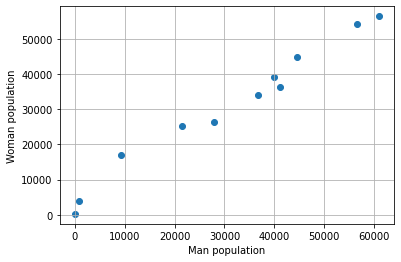

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
name = input('행정구역(이름)을 입력하세요 : ')

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    break

f.close()

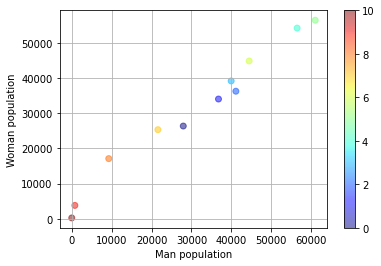

In [ ]:
plt.scatter(man_population, woman_population, c=range(11), alpha=0.5, cmap='jet')
plt.colorbar()
plt.grid()
plt.xlabel('Man population')
plt.ylabel('Woman population')
plt.show()

위 그래프에서 마커의 색은 0\~9세, 10세\~19세, ..., 90\~99세, 100세 이상의 연령대를 나타내고 있습니다.

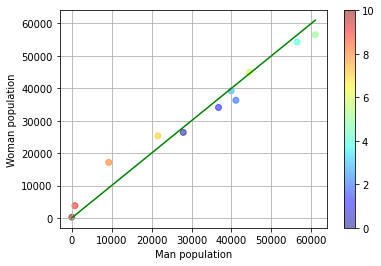

In [ ]:
plt.scatter(man_population, woman_population, c=range(11), alpha=0.5, cmap='jet')

max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')

plt.colorbar()
plt.grid()
plt.xlabel('Man population')
plt.ylabel('Woman population')
plt.show()

위 그래프를 어떻게 읽어야 할까요? 어떻게 해석해야 할까요? 다시 말해서 위 그래프에는 어떤 의미가 담겨 있을까요?

먼저 녹색 직선의 의미는 y = x의 직선입니다. 즉 전연열대에 걸쳐 남자 수와 여자 수가 같을 경우 위와 같은 직선이 그어질 것입니다.

다음으로 마커의 색깔을 살펴 보겠습니다. 파란색에서 하늘색까지는 대략 0\~50대를 의미하는데 여자 보다 남자의 수가 더 적습니다. 그리고 마터의 색깔이 붉은 계열로 가면 70\~99대, 100세 이상의 연령대에 의미합니다. 이 연령 대를 나타내는 마커는 녹색 직선 위에 있습니다. 즉 남자 보다 여자의 수가 더 많다는 뜻입니다.

이번에는 연령 별 남성과 여성의 인구수를 합친 값을 ```scatter()``` 함수의 ```s``` 속성에 넣어서 버블 차트로 표현해 보겠습니다.


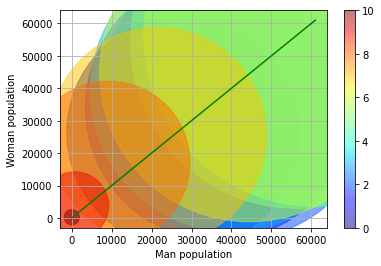

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
size =[]
name = '제주특별자치도  (5000000000)'

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    for i in range(len(man_population)):
      #size.append( 0.01*(man_population[i] + woman_population[i]) )
      size.append( man_population[i] + woman_population[i] )
    break

f.close()

plt.scatter(man_population, woman_population, c=range(11), s=size, alpha=0.5, cmap='jet')

max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')

plt.colorbar()
plt.grid()
plt.xlabel('Man population')
plt.ylabel('Woman population')
plt.show()

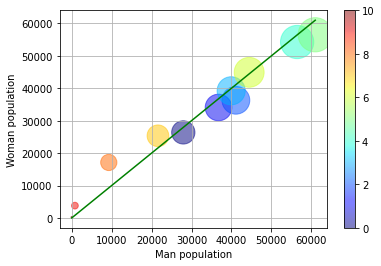

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
size =[]
name = '제주특별자치도  (5000000000)'

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    for i in range(len(man_population)):
      size.append( 0.01*(man_population[i] + woman_population[i]) )
      #size.append( man_population[i] + woman_population[i] )
    break

f.close()

plt.scatter(man_population, woman_population, c=range(11), s=size, alpha=0.5, cmap='jet')

max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')

plt.colorbar()
plt.grid()
plt.xlabel('Man population')
plt.ylabel('Woman population')
plt.show()

위 버블 차트에서 마커의 색은 연령대, 위치(x,y)는 (x=남자 인구수, y=여자 인구수)를 나타내며 마커의 크기는 연령대 별 인구수(남+여)의 나타냅니다.

#####Quiz
아래 코드의 실행 결과를 살펴 보고 강사가 이 시점에서 아래 코드를 제시한 이유를 생각해보세요. 제 의도를 짐작하시기 어렵다면 그냥 넘어가셔도 됩니다. 어떻게 남의 속을 알겠습니까?

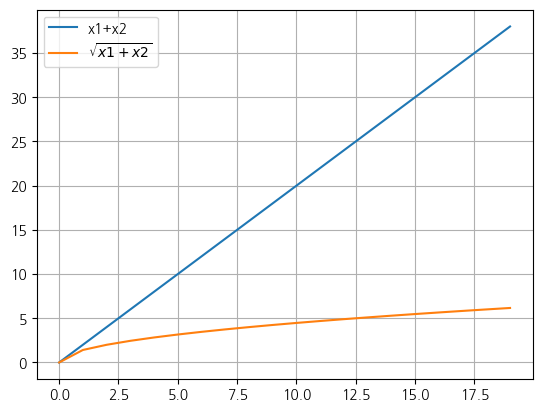

In [ ]:
import numpy as np
import math
x = np.array( range(20) )
y = np.array( range(20) )

plt.plot(x, x+y, label = 'x1+x2')
plt.plot(x, np.sqrt(x+y), label = '$\sqrt{x1+x2}$')
plt.legend()
plt.grid()
plt.show()

아래 코드를 살펴 보십시요. 코드셀 위에 위에 있는 코드와 무엇이 달라졌나요?

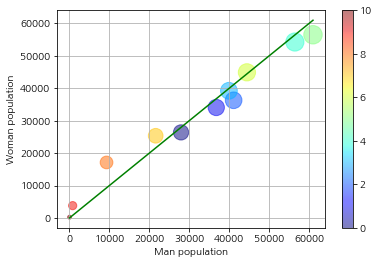

In [ ]:
import csv
import matplotlib.pyplot as plt
#여기를 보세요요
import math

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
size =[]
name = '제주특별자치도  (5000000000)'

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    for i in range(len(man_population)):
      # 여기를 보세요.
      size.append( math.sqrt(man_population[i] + woman_population[i]) )
    break

f.close()

plt.scatter(man_population, woman_population, c=range(11), s=size, alpha=0.5, cmap='jet')

max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')

plt.colorbar()
plt.grid()
plt.xlabel('Man population')
plt.ylabel('Woman population')
plt.show()

자 그렇다면 이제 '부산광역시'의 연령대별 인구 분포에 대해 살펴보겠습니다.

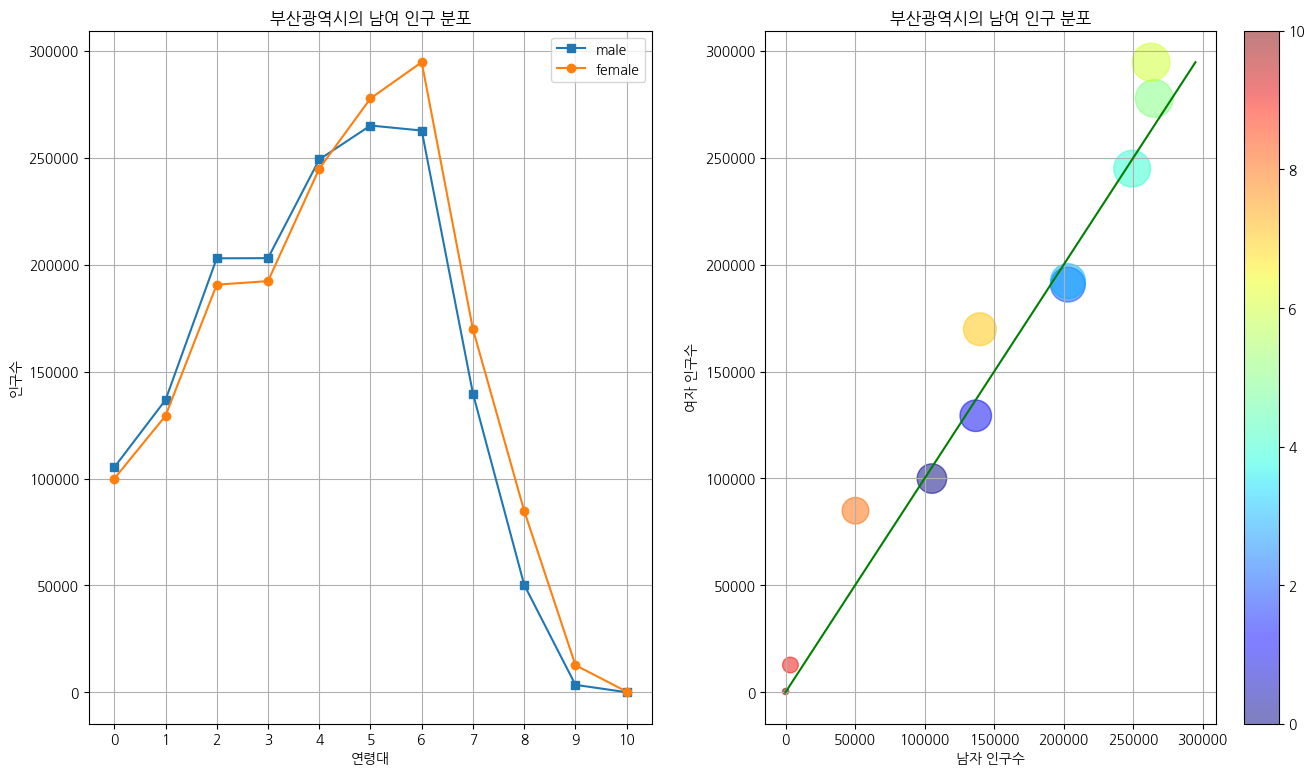

In [ ]:
import csv
import matplotlib.pyplot as plt
import math
import koreanize_matplotlib

f = open('gender_202307.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
size =[]
name = '부산광역시  (2600000000)'

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    for i in range(len(man_population)):
      size.append( math.sqrt(man_population[i] + woman_population[i]) )
    break

f.close()

plt.figure(figsize=(16,9))
# subplot(1, 2, 2) ------------------------------------------------------------
plt.subplot(1,2,2)
plt.scatter(man_population, woman_population, c=range(11), s=size, alpha=0.5, cmap='jet')
plt.colorbar()

max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')
plt.grid()
plt.xlabel('남자 인구수')
plt.ylabel('여자 인구수')
plt.title('부산광역시의 남여 인구 분포')

# subplot(1, 2, 1) ------------------------------------------------------------
plt.subplot(1,2,1)
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('부산광역시의 남여 인구 분포')
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.legend()
plt.grid()
plt.show()

위 왼쪽 그래프를 보면 20대 (남자 수, 여자 수)와 30대 (남자 수, 여자 수)가 비슷합니다. 굳이 더 따져 보자면 파란색 사각형 마커로 표현된 20대 남자 수와 30대 남자 수는 거의 같아 보이며 주황색인 원형 마커로 표현된 20대와 30대의 여자 수는 30대 여자의 수가 조금 더 많이 보입니다.

이러한 상황은 위 오른쪽 그래프에서 20대를 나타내는 마커와 30대를 나타내는 마커의 크기(남여합산 인구수)가 비슷하게 나타나며 20대 (남자 수, 여자 수)와 30대 (남자 수, 여자 수)가 비슷함으로 비슷한 위치에 각각의 마커가 자리하게 됩니다. 비슷한 크기 비슷한 위치(좌표)에 놓이게 되기 때문에 두 마커는 심하게 겹쳐 보이게 될 것입니다.

위 오른쪽 그래프(버블 차트)는 읽고 해석하기가 어렵게 느껴집니다. 왼쪽 그래프(버블 차트)가 조금 더 읽고 해석하기 쉬운 그래프가 되도록 코드를 수정해 보겠습니다. 저는 10, 20, 30, 40대에 관심이 있습니다.

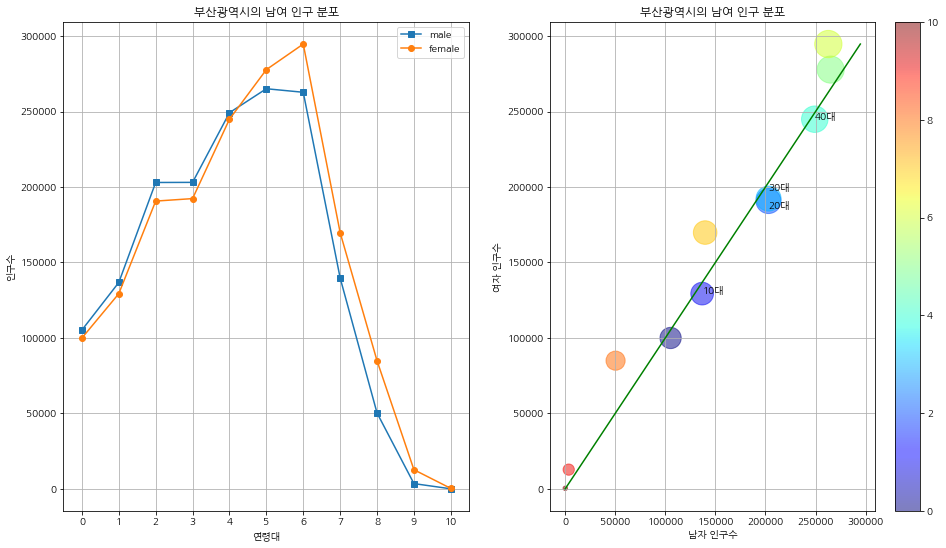

In [ ]:
import csv
import matplotlib.pyplot as plt
import math
import koreanize_matplotlib

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
size =[]
name = '부산광역시  (2600000000)'

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    for i in range(len(man_population)):
      size.append( math.sqrt(man_population[i] + woman_population[i]) )
    break

f.close()

plt.figure(figsize=(16,9))
# subplot(1, 2, 2) ------------------------------------------------------------
plt.subplot(1,2,2)
plt.scatter(man_population, woman_population, c=range(11), s=size, alpha=0.5, cmap='jet')
plt.colorbar()
###################
plt.text(man_population[1], woman_population[1], '10대')
plt.text(man_population[2], woman_population[2]-5000, '20대')
plt.text(man_population[3], woman_population[3]+5000, '30대')
plt.text(man_population[4], woman_population[4], '40대')
##################
max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')
plt.grid()
plt.xlabel('남자 인구수')
plt.ylabel('여자 인구수')
plt.title('부산광역시의 남여 인구 분포')

# subplot(1, 2, 1) ------------------------------------------------------------
plt.subplot(1,2,1)
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('부산광역시의 남여 인구 분포')
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.legend()
plt.grid()
plt.show()

이쯤 되니, '난 모르겠고 글씨나 좀 키워봐~'하는 생각이 드시나요?
```python
font = {'size':14}
plt.text(x, y, 'text', fontdict=font)
```

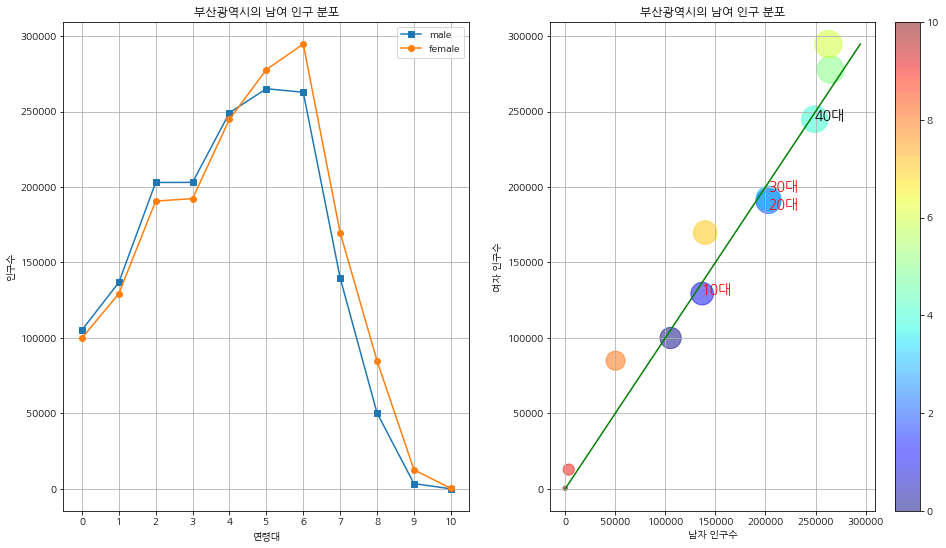

In [ ]:
import csv
import matplotlib.pyplot as plt
import math
import koreanize_matplotlib

f = open('gender.csv', encoding='cp949')
data = csv.reader(f)
next(data)

man_population =[]
woman_population =[]
size =[]
name = '부산광역시  (2600000000)'

for row in data:
  if name in row[0]:
    for number in row[3:14]:
      man_population.append( int(number.replace(',','')) )
    for number in row[16:]:
      woman_population.append( int(number.replace(',','')) )
    for i in range(len(man_population)):
      size.append( math.sqrt(man_population[i] + woman_population[i]) )
    break

f.close()

plt.figure(figsize=(16,9))
# subplot(1, 2, 2) ------------------------------------------------------------
plt.subplot(1,2,2)
plt.scatter(man_population, woman_population, c=range(11), s=size, alpha=0.5, cmap='jet')
plt.colorbar()
###################
plt.text(man_population[1], woman_population[1], '10대', fontdict={'size':14, 'color':'red'})
plt.text(man_population[2], woman_population[2]-5000, '20대', fontdict={'size':14, 'color':'red'})
plt.text(man_population[3], woman_population[3]+5000, '30대', fontdict={'size':14, 'color':'red'})
plt.text(man_population[4], woman_population[4], '40대',fontdict={'size':14})
##################
max_age_man = max(man_population)
max_age_woman = max(woman_population)
if max_age_man >= max_age_woman:
  max_age = max_age_man
else:
  max_age = max_age_woman

plt.plot( range(max_age), range(max_age), 'g')
plt.grid()
plt.xlabel('남자 인구수')
plt.ylabel('여자 인구수')
plt.title('부산광역시의 남여 인구 분포')

# subplot(1, 2, 1) ------------------------------------------------------------
plt.subplot(1,2,1)
plt.plot(range(11), man_population, 's-', label='male')
plt.plot(range(11), woman_population,'o-', label='female')
x_tick = list(range(0, 11))
plt.xticks(x_tick)

plt.title('부산광역시의 남여 인구 분포')
plt.xlabel('연령대')
plt.ylabel('인구수')
plt.legend()
plt.grid()
plt.show()

#####Quiz
이쯤에서 위 코드셀에 있는 코드를 깔끔하게 정리를 해보십시요.

###Quiz


In [ ]:
adic = {
    'name':'kim',
    'age' : 27
}

bdic = {
    'name':'sung',
    'age': 22
}

message = [
    [1, 2, 3, adic, 'a', 'kim'],
    ['phil', 1, 5, 7, 4, 4, 4, 2, adic, bdic],
    [bdic, (3, 2), 3.14, {'goal':90, 'target':95}]
]
